# Bibliotecas

In [1]:
import itertools
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as stats
import tensorflow as tf

from keras import Sequential
from keras.layers import Dense
from PIL import Image
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Import dos CSVs

## pokemons_criacao.csv

In [2]:
pokemons_criacao = pd.read_csv('pokemons_criacao.csv',encoding='utf-8',sep=';')
len(pokemons_criacao)

8

## pokemons_1.csv

In [3]:
pokemons_1 = pd.read_csv('pokemons_1.csv',encoding='utf-8',sep=';')
len(pokemons_1)

151

## pokemons_2.csv

In [4]:
pokemons_2 = pd.read_csv('pokemons_2.csv',encoding='utf-8',sep=';')
len(pokemons_2)

100

## pokemons_3.csv

In [5]:
pokemons_3 = pd.read_csv('pokemons_3.csv',encoding='utf-8',sep=';')
len(pokemons_3)

135

## pokemons_4.csv

In [6]:
pokemons_4 = pd.read_csv('pokemons_4.csv',encoding='utf-8',sep=';')
len(pokemons_4)

107

## pokemons_5a8.csv

In [7]:
pokemons_5a8 = pd.read_csv('pokemons_5a8.csv',encoding='utf-8',sep=';')
len(pokemons_5a8)

412

## pokemons_batalha.csv

In [8]:
pokemons_batalha = pd.read_csv('pokemons_batalha.csv',encoding='utf-8',sep=';')
len(pokemons_batalha)

4887

## pokemons_habilidades.csv

In [9]:
pokemons_habilidades = pd.read_csv('pokemons_habilidades.csv',encoding='utf-8',sep=';')
len(pokemons_habilidades)

905

## pokemons_informacoes_1a6.csv

In [10]:
pokemons_informacoes_1a6 = pd.read_csv('pokemons_informacoes_1a6.csv',encoding='utf-8',sep=';')
len(pokemons_informacoes_1a6)

721

## pokemons_informacoes_7a8.csv

In [11]:
pokemons_informacoes_7a8 = pd.read_csv('pokemons_informacoes_7a8.csv',encoding='utf-8',sep=';')
len(pokemons_informacoes_7a8)

184

_Todos os arquivos foram carregados e a quantidade de linhas validadas._

# DATA CLEANING

## pokemons_criacao

In [12]:
pokemons_criacao[pokemons_criacao.isnull().T.any()]

,Geracao,DataCriacao


In [13]:
print(pokemons_criacao.dtypes)

Geracao         int64
DataCriacao    object
dtype: object


In [14]:
pokemons_criacao.DataCriacao = pd.to_datetime(pokemons_criacao.DataCriacao, format='%d/%m/%Y')

In [15]:
print(pokemons_criacao.dtypes)

Geracao                 int64
DataCriacao    datetime64[ns]
dtype: object


_A data foi convertida para datatime, pois estava com o tipo object._

## pokemons_1

In [16]:
pokemons_1[pokemons_1.isnull().T.any()]

,Numero,Nome,Geracao


In [17]:
pokemons_1.groupby(['Geracao']).count()

,Numero,Nome
Geracao,,
1,151,151


In [18]:
print(pokemons_1.dtypes)

Numero      int64
Nome       object
Geracao     int64
dtype: object


In [19]:
pokemons_1 = pokemons_1.set_index('Numero')
pokemons_1.head()

,Nome,Geracao
Numero,,
1,Bulbasaur,1
2,Ivysaur,1
3,Venusaur,1
4,Charmander,1
5,Charmeleon,1


_Não existem valores nulos, os tipos estão conforme necessidade e os valores estão corretos._

## POKEMONS_2

In [20]:
pokemons_2[pokemons_2.isnull().T.any()]

,Numero,Nome,Geracao


In [21]:
pokemons_2.loc[pokemons_2.Geracao == '2ª','Geracao'] = '2'
pokemons_2.groupby(['Geracao']).count()

,Numero,Nome
Geracao,,
2,100,100


In [22]:
print(pokemons_2.dtypes)

Numero      int64
Nome       object
Geracao    object
dtype: object


In [23]:
pokemons_2['Geracao'] = pd.to_numeric(pokemons_2['Geracao'])
print(pokemons_2.dtypes)

Numero      int64
Nome       object
Geracao     int64
dtype: object


In [24]:
pokemons_2 = pokemons_2.set_index('Numero')
pokemons_2.head()

,Nome,Geracao
Numero,,
152,Chikorita,2
153,Bayleef,2
154,Meganium,2
155,Cyndaquil,2
156,Quilava,2


_A GERACAO estava com o valor errado, foi modificado de 2ª para 2 e seu tipo alterado para inteiro._

## POKEMONS_3

In [25]:
pokemons_3[pokemons_3.isnull().T.any()]

,Numero,Nome,Geracao


In [26]:
pokemons_3.groupby(['Geracao']).count()

,Numero,Nome
Geracao,,
3,135,135


In [27]:
print(pokemons_3.dtypes)

Numero      int64
Nome       object
Geracao     int64
dtype: object


In [28]:
pokemons_3 = pokemons_3.set_index('Numero')
pokemons_3.head()

,Nome,Geracao
Numero,,
252,Treecko,3
253,Grovyle,3
254,Sceptile,3
255,Torchic,3
256,Combusken,3


_Não existem valores nulos, os tipos estão conforme necessidade e os valores estão corretos._

## POKEMONS_4

In [29]:
pokemons_4[pokemons_4.isnull().T.any()]

,Numero,Nome,Geracao


In [30]:
pokemons_4.groupby(['Geracao']).count()

,Numero,Nome
Geracao,,
4th,107,107


In [31]:
pokemons_4.loc[pokemons_4.Geracao == '4th','Geracao'] = '4'
pokemons_4.groupby(['Geracao']).count()

,Numero,Nome
Geracao,,
4,107,107


In [32]:
print(pokemons_4.dtypes)

Numero      int64
Nome       object
Geracao    object
dtype: object


In [33]:
pokemons_4['Geracao'] = pd.to_numeric(pokemons_4['Geracao'])
print(pokemons_4.dtypes)

Numero      int64
Nome       object
Geracao     int64
dtype: object


In [34]:
pokemons_4 = pokemons_4.set_index('Numero')
pokemons_4.head()

,Nome,Geracao
Numero,,
387,Turtwig,4
388,Grotle,4
389,Torterra,4
390,Chimchar,4
391,Monferno,4


_A GERACAO estava com o valor errado, foi modificado de 4th para 4 e seu tipo alterado para inteiro._

## POKEMONS_5a8

In [35]:
pokemons_5a8[pokemons_5a8.isnull().T.any()]

,Numero,Nome,Geracao


In [36]:
pokemons_5a8.groupby(['Geracao']).count()

,Numero,Nome
Geracao,,
5,156,156
6,72,72
7,88,88
8,96,96


In [37]:
print(pokemons_5a8.dtypes)

Numero      int64
Nome       object
Geracao     int64
dtype: object


In [38]:
pokemons_5a8 = pokemons_5a8.set_index('Numero')
pokemons_5a8.head()

,Nome,Geracao
Numero,,
494,Victini,5
495,Snivy,5
496,Servine,5
497,Serperior,5
498,Tepig,5


_Não existem valores nulos, os tipos estão conforme necessidade e os valores estão corretos._

## POKEMONS_BATALHA

In [39]:
pokemons_batalha[pokemons_batalha.isnull().T.any()]

,Numero,Sexo,Level,HP,Ataque,Defesa,AtaqueEspecial,DefesaEspecial,Rapidez


In [40]:
print(pokemons_batalha.dtypes)

Numero             int64
Sexo              object
Level              int64
HP                 int64
Ataque             int64
Defesa             int64
AtaqueEspecial     int64
DefesaEspecial     int64
Rapidez            int64
dtype: object


In [41]:
pokemons_batalha = pokemons_batalha.set_index('Numero')
pokemons_batalha.head()

,Sexo,Level,HP,Ataque,Defesa,AtaqueEspecial,DefesaEspecial,Rapidez
Numero,,,,,,,,
1,M,1,45,49,49,65,65,45
1,M,50,152,111,111,128,128,106
1,M,100,294,216,216,251,251,207
1,F,1,45,49,49,65,65,45
1,F,50,152,111,111,128,128,106


_Não existem valores nulos, os tipos estão conforme necessidade e os valores estão corretos._

## POKEMONS_HABILIDADES

In [42]:
pokemons_habilidades[pokemons_habilidades.isnull().T.any()]

,Numero,Habilidade1,Habilidade2,HabilidadeOculta
0,1,overgrow,NaN,chlorophyll
1,2,overgrow,NaN,chlorophyll
2,3,overgrow,NaN,chlorophyll
3,4,blaze,NaN,solar-power
4,5,blaze,NaN,solar-power
...,...,...,...,...
894,895,dragons-maw,NaN,NaN
895,896,chilling-neigh,NaN,NaN
896,897,grim-neigh,NaN,NaN
897,898,unnerve,NaN,NaN


In [43]:
pokemons_habilidades.loc[pokemons_habilidades.Habilidade2.isnull(),'Habilidade2'] = ''

In [44]:
pokemons_habilidades.loc[pokemons_habilidades.HabilidadeOculta.isnull(),'HabilidadeOculta'] = ''

In [45]:
pokemons_habilidades.isnull().sum()

Numero              0
Habilidade1         0
Habilidade2         0
HabilidadeOculta    0
dtype: int64

In [46]:
print(pokemons_habilidades.dtypes)

Numero               int64
Habilidade1         object
Habilidade2         object
HabilidadeOculta    object
dtype: object


In [47]:
pokemons_habilidades['Habilidade1'] = pokemons_habilidades['Habilidade1'].str.capitalize()
pokemons_habilidades['Habilidade2'] = pokemons_habilidades['Habilidade2'].str.capitalize()
pokemons_habilidades['HabilidadeOculta'] = pokemons_habilidades['HabilidadeOculta'].str.capitalize()

In [48]:
pokemons_habilidades = pokemons_habilidades.set_index('Numero')
pokemons_habilidades.head()

,Habilidade1,Habilidade2,HabilidadeOculta
Numero,,,
1,Overgrow,,Chlorophyll
2,Overgrow,,Chlorophyll
3,Overgrow,,Chlorophyll
4,Blaze,,Solar-power
5,Blaze,,Solar-power


_Existiam valores nulos nas colunas HABILIDADE2 e HABILIDADEOCULTA, para não haver problemas posteriores na analise dos dados, esses valores foram alterados para '' (vazio), pois não são informações obrigatórias. Foi colocado letra maiuscula na primeira letra de todas as habilidades._

## POKEMONS_INFORMACOES_1a6

In [49]:
pokemons_informacoes_1a6[pokemons_informacoes_1a6.isnull().T.any()]

,Numero,Nome,Cor,OvoTipo1,OvoTipo2,Tipo1,Tipo2,Tamanho,Peso,Lendario,Mistico
3,4,Charmander,vermelho,monstro,dragao,fogo,NaN,0.6,8.5,0,0
4,5,Charmeleon,vermelho,monstro,dragao,fogo,NaN,1.1,19.0,0,0
6,7,Squirtle,azul,monstro,agua_1,agua,NaN,0.5,9.0,0,0
7,8,Wartortle,azul,monstro,agua_1,agua,NaN,1.0,22.5,0,0
8,9,Blastoise,azul,monstro,agua_1,agua,NaN,1.6,85.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,vermelho,desconhecido,NaN,sombrio,voador,5.8,203.0,1,0
717,718,Zygarde,verde,desconhecido,NaN,dragao,fantasma,5.0,305.0,1,0
718,719,Diancie,rosa,desconhecido,NaN,pedra,fada,0.7,8.8,0,1
719,720,Hoopa,roxo,desconhecido,NaN,psiquico,fantasma,0.5,9.0,0,1


In [50]:
pokemons_informacoes_1a6.loc[pokemons_informacoes_1a6.OvoTipo2.isnull(),'OvoTipo2'] = ''

In [51]:
pokemons_informacoes_1a6.loc[pokemons_informacoes_1a6.Tipo2.isnull(),'Tipo2'] = ''

In [52]:
pokemons_informacoes_1a6.isnull().sum()

Numero      0
Nome        0
Cor         0
OvoTipo1    0
OvoTipo2    0
Tipo1       0
Tipo2       0
Tamanho     0
Peso        0
Lendario    0
Mistico     0
dtype: int64

In [53]:
print(pokemons_informacoes_1a6.dtypes)

Numero        int64
Nome         object
Cor          object
OvoTipo1     object
OvoTipo2     object
Tipo1        object
Tipo2        object
Tamanho     float64
Peso        float64
Lendario      int64
Mistico       int64
dtype: object


In [54]:
pokemons_informacoes_1a6.groupby(['Lendario']).count().Numero

Lendario
0    683
1     38
Name: Numero, dtype: int64

In [55]:
pokemons_informacoes_1a6.groupby(['Mistico']).count().Numero

Mistico
0    705
1     16
Name: Numero, dtype: int64

In [56]:
pokemons_informacoes_1a6.iloc[:, 9:] = pokemons_informacoes_1a6.iloc[:, 9:].astype(bool)

In [57]:
print(pokemons_informacoes_1a6.dtypes)

Numero        int64
Nome         object
Cor          object
OvoTipo1     object
OvoTipo2     object
Tipo1        object
Tipo2        object
Tamanho     float64
Peso        float64
Lendario       bool
Mistico        bool
dtype: object


In [58]:
pokemons_informacoes_1a6['Cor'] = pokemons_informacoes_1a6['Cor'].str.capitalize()
pokemons_informacoes_1a6['OvoTipo1'] = pokemons_informacoes_1a6['OvoTipo1'].str.capitalize()
pokemons_informacoes_1a6['OvoTipo2'] = pokemons_informacoes_1a6['OvoTipo2'].str.capitalize()
pokemons_informacoes_1a6['Tipo1'] = pokemons_informacoes_1a6['Tipo1'].str.capitalize()
pokemons_informacoes_1a6['Tipo2'] = pokemons_informacoes_1a6['Tipo2'].str.capitalize()

In [59]:
pokemons_informacoes_1a6 = pokemons_informacoes_1a6.set_index('Numero')
pokemons_informacoes_1a6.head()

,Nome,Cor,OvoTipo1,OvoTipo2,Tipo1,Tipo2,Tamanho,Peso,Lendario,Mistico
Numero,,,,,,,,,,
1,Bulbasaur,Verde,Monstro,Grama,Grama,Veneno,0.7,6.9,False,False
2,Ivysaur,Verde,Monstro,Grama,Grama,Veneno,1.0,13.0,False,False
3,Venusaur,Verde,Monstro,Grama,Grama,Veneno,2.0,100.0,False,False
4,Charmander,Vermelho,Monstro,Dragao,Fogo,,0.6,8.5,False,False
5,Charmeleon,Vermelho,Monstro,Dragao,Fogo,,1.1,19.0,False,False


_Existiam valores nulos nas colunas OVOTIPO2 e TIPO2, para não haver problemas posteriores na analise dos dados, esses valores foram alterados para '' (vazio), pois não são informações obrigatórias. As informações das colunas LEGENDARIO e MISTICO são boleanas, porém vieram com os valores 1 e 0 (int), dessa forma foi efetuada a conversão das informações para TRUE e FALSE. Foi colocado letra maiuscula na primeira letra dos objects._

## POKEMONS_INFORMACOES_7a8

In [60]:
pokemons_informacoes_7a8[pokemons_informacoes_7a8.isnull().T.any()]

,Numero,Nome,Cor,OvoTipo1,OvoTipo2,Tipo1,Tipo2,Tamanho,Peso,Lendario,Mistico
0,722,Rowlet,marrom,voador,NaN,grama,voador,"0,3","1,5",F,F
1,723,Dartrix,marrom,voador,NaN,grama,voador,"0,7",16,F,F
2,724,Decidueye,marrom,voador,NaN,grama,fantasma,"1,6","36,6",F,F
3,725,Litten,vermelho,campo,NaN,fogo,NaN,"0,4","4,3",F,F
4,726,Torracat,vermelho,campo,NaN,fogo,NaN,"0,7",25,F,F
...,...,...,...,...,...,...,...,...,...,...,...
179,901,Ursaluna,marrom,campo,NaN,terra,normal,"2,4",290,F,F
180,902,Basculegion,verde,agua_2,NaN,agua,fantasma,3,110,F,F
181,903,Sneasler,azul,campo,NaN,lutador,veneno,"1,3",43,F,F
182,904,Overqwil,preto,agua_2,NaN,sombrio,veneno,"2,5","60,5",F,F


In [61]:
pokemons_informacoes_7a8.loc[pokemons_informacoes_7a8.OvoTipo2.isnull(),'OvoTipo2'] = ''

In [62]:
pokemons_informacoes_7a8.loc[pokemons_informacoes_7a8.Tipo2.isnull(),'Tipo2'] = ''

In [63]:
pokemons_informacoes_7a8.isnull().sum()

Numero      0
Nome        0
Cor         0
OvoTipo1    0
OvoTipo2    0
Tipo1       0
Tipo2       0
Tamanho     0
Peso        0
Lendario    0
Mistico     0
dtype: int64

In [64]:
print(pokemons_informacoes_7a8.dtypes)

Numero       int64
Nome        object
Cor         object
OvoTipo1    object
OvoTipo2    object
Tipo1       object
Tipo2       object
Tamanho     object
Peso        object
Lendario    object
Mistico     object
dtype: object


In [65]:
pokemons_informacoes_7a8['Tamanho'] = pd.to_numeric(pokemons_informacoes_7a8['Tamanho'].str.replace(',','.'), downcast="float")

In [66]:
pokemons_informacoes_7a8['Peso'] = pd.to_numeric(pokemons_informacoes_7a8['Peso'].str.replace(',','.'), downcast="float")

In [67]:
pokemons_informacoes_7a8['Lendario'] = pd.to_numeric(pokemons_informacoes_7a8['Lendario'].replace(['F','T'],['0','1'])).astype(bool)

In [68]:
pokemons_informacoes_7a8['Mistico'] = pd.to_numeric(pokemons_informacoes_7a8['Mistico'].replace(['F','T'],['0','1'])).astype(bool)

In [69]:
print(pokemons_informacoes_7a8.dtypes)

Numero        int64
Nome         object
Cor          object
OvoTipo1     object
OvoTipo2     object
Tipo1        object
Tipo2        object
Tamanho     float32
Peso        float32
Lendario       bool
Mistico        bool
dtype: object


In [70]:
pokemons_informacoes_7a8['Cor'] = pokemons_informacoes_7a8['Cor'].str.capitalize()
pokemons_informacoes_7a8['OvoTipo1'] = pokemons_informacoes_7a8['OvoTipo1'].str.capitalize()
pokemons_informacoes_7a8['OvoTipo2'] = pokemons_informacoes_7a8['OvoTipo2'].str.capitalize()
pokemons_informacoes_7a8['Tipo1'] = pokemons_informacoes_7a8['Tipo1'].str.capitalize()
pokemons_informacoes_7a8['Tipo2'] = pokemons_informacoes_7a8['Tipo2'].str.capitalize()

In [71]:
pokemons_informacoes_7a8 = pokemons_informacoes_7a8.set_index('Numero')
pokemons_informacoes_7a8.head()

,Nome,Cor,OvoTipo1,OvoTipo2,Tipo1,Tipo2,Tamanho,Peso,Lendario,Mistico
Numero,,,,,,,,,,
722,Rowlet,Marrom,Voador,,Grama,Voador,0.3,1.500000,False,False
723,Dartrix,Marrom,Voador,,Grama,Voador,0.7,16.000000,False,False
724,Decidueye,Marrom,Voador,,Grama,Fantasma,1.6,36.599998,False,False
725,Litten,Vermelho,Campo,,Fogo,,0.4,4.300000,False,False
726,Torracat,Vermelho,Campo,,Fogo,,0.7,25.000000,False,False


_Existiam valores nulos nas colunas OVOTIPO2 e TIPO2, para não haver problemas posteriores na analise dos dados, esses valores foram alterados para '' (vazio), pois não são informações obrigatórias. As informações das colunas TAMANHO e PESO vieram com , (virgula) ao invés de . (ponto), foi efetuada o replace de virgula para ponto e posteriormente a conversão do datatype para float. As informações das colunas LEGENDARIO e MISTICO são boleanas, porém vieram com os valores T e F (object), dessa forma foi efetuada a conversão das informações para TRUE e FALSE. Foi colocado letra maiuscula na primeira letra dos objects._

# DATA FUSION

## pokemons_geracao

In [72]:
pokemons_geracao = pd.concat([pokemons_1,pokemons_2,pokemons_3,pokemons_4,pokemons_5a8]).sort_values(by='Numero')
pokemons_geracao.head()

,Nome,Geracao
Numero,,
1,Bulbasaur,1
2,Ivysaur,1
3,Venusaur,1
4,Charmander,1
5,Charmeleon,1


_Os dataframes POKEMONS_1, POKEMONS_2, POKEMONS_3, POKEMONS_4 e POKEMONS_5a8, possuem os mesmos dados, porém estão em arquivos diferentes, pois seus dados vieram de 5 fontes diferentes._

## pokemons_informacoes

In [73]:
pokemons_informacoes = pd.concat([pokemons_informacoes_1a6,pokemons_informacoes_7a8]).sort_values(by='Numero')
pokemons_informacoes.head()

,Nome,Cor,OvoTipo1,OvoTipo2,Tipo1,Tipo2,Tamanho,Peso,Lendario,Mistico
Numero,,,,,,,,,,
1,Bulbasaur,Verde,Monstro,Grama,Grama,Veneno,0.7,6.9,False,False
2,Ivysaur,Verde,Monstro,Grama,Grama,Veneno,1.0,13.0,False,False
3,Venusaur,Verde,Monstro,Grama,Grama,Veneno,2.0,100.0,False,False
4,Charmander,Vermelho,Monstro,Dragao,Fogo,,0.6,8.5,False,False
5,Charmeleon,Vermelho,Monstro,Dragao,Fogo,,1.1,19.0,False,False


_Os dataframes POKEMONS_INFORMACOES_1a6 e POKEMONS_INFORMACOES_7a8, possuem os mesmos dados, porém estão em arquivos diferentes, pois seus dados vieram de 2 fontes diferentes._

## pokemons_dados

In [74]:
pokemons_dados = pd.merge(pokemons_geracao, pokemons_informacoes[['Cor','OvoTipo1','OvoTipo2','Tipo1','Tipo2','Tamanho','Peso','Lendario','Mistico']], on=["Numero"], how="inner")
pokemons_dados.head()

,Nome,Geracao,Cor,OvoTipo1,OvoTipo2,Tipo1,Tipo2,Tamanho,Peso,Lendario,Mistico
Numero,,,,,,,,,,,
1,Bulbasaur,1,Verde,Monstro,Grama,Grama,Veneno,0.7,6.9,False,False
2,Ivysaur,1,Verde,Monstro,Grama,Grama,Veneno,1.0,13.0,False,False
3,Venusaur,1,Verde,Monstro,Grama,Grama,Veneno,2.0,100.0,False,False
4,Charmander,1,Vermelho,Monstro,Dragao,Fogo,,0.6,8.5,False,False
5,Charmeleon,1,Vermelho,Monstro,Dragao,Fogo,,1.1,19.0,False,False


In [75]:
pokemons_dados = pokemons_dados.join(pokemons_habilidades,on='Numero')

In [76]:
pokemons_dados[pokemons_dados.isnull().T.any()]

,Nome,Geracao,Cor,OvoTipo1,OvoTipo2,Tipo1,Tipo2,Tamanho,Peso,Lendario,Mistico,Habilidade1,Habilidade2,HabilidadeOculta
Numero,,,,,,,,,,,,,,


In [77]:
pokemons_dados.head()

,Nome,Geracao,Cor,OvoTipo1,OvoTipo2,Tipo1,Tipo2,Tamanho,Peso,Lendario,Mistico,Habilidade1,Habilidade2,HabilidadeOculta
Numero,,,,,,,,,,,,,,
1,Bulbasaur,1,Verde,Monstro,Grama,Grama,Veneno,0.7,6.9,False,False,Overgrow,,Chlorophyll
2,Ivysaur,1,Verde,Monstro,Grama,Grama,Veneno,1.0,13.0,False,False,Overgrow,,Chlorophyll
3,Venusaur,1,Verde,Monstro,Grama,Grama,Veneno,2.0,100.0,False,False,Overgrow,,Chlorophyll
4,Charmander,1,Vermelho,Monstro,Dragao,Fogo,,0.6,8.5,False,False,Blaze,,Solar-power
5,Charmeleon,1,Vermelho,Monstro,Dragao,Fogo,,1.1,19.0,False,False,Blaze,,Solar-power


_Sabemos que temos 905 Pokemons dessa forma podemos concluir, que após analise de nulos e quantidade de dados, o dataframe POKEMONS está com os dados de todos os Pokemons existentes até o momento._

## pokemons_stats

In [78]:
pokemons_stats = pd.concat([pokemons_batalha]).sort_values(by='Numero')
pokemons_stats.head()

,Sexo,Level,HP,Ataque,Defesa,AtaqueEspecial,DefesaEspecial,Rapidez
Numero,,,,,,,,
1,M,1,45,49,49,65,65,45
1,M,50,152,111,111,128,128,106
1,M,100,294,216,216,251,251,207
1,F,1,45,49,49,65,65,45
1,F,50,152,111,111,128,128,106


_Com a analise acima, conseguimos identificar que existem sexos de Pokemons inexistentes na base de batalhas, isso porque existem Pokemons que só são do sexo feminino ou masculino, por isso, foi montada a tabela POKEMON_STATS com somente os dados existentes/verdadeiros._

## pokemons

In [79]:
pokemons = (pd.merge(pokemons_dados,pokemons_criacao,on='Geracao').set_index(pokemons_dados.index)).join(pokemons_stats,on='Numero')
pokemons.head()

,Nome,Geracao,Cor,OvoTipo1,OvoTipo2,Tipo1,Tipo2,Tamanho,Peso,Lendario,...,HabilidadeOculta,DataCriacao,Sexo,Level,HP,Ataque,Defesa,AtaqueEspecial,DefesaEspecial,Rapidez
Numero,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,1,Verde,Monstro,Grama,Grama,Veneno,0.7,6.9,False,...,Chlorophyll,1996-02-27,M,1,45,49,49,65,65,45
1,Bulbasaur,1,Verde,Monstro,Grama,Grama,Veneno,0.7,6.9,False,...,Chlorophyll,1996-02-27,M,50,152,111,111,128,128,106
1,Bulbasaur,1,Verde,Monstro,Grama,Grama,Veneno,0.7,6.9,False,...,Chlorophyll,1996-02-27,M,100,294,216,216,251,251,207
1,Bulbasaur,1,Verde,Monstro,Grama,Grama,Veneno,0.7,6.9,False,...,Chlorophyll,1996-02-27,F,1,45,49,49,65,65,45
1,Bulbasaur,1,Verde,Monstro,Grama,Grama,Veneno,0.7,6.9,False,...,Chlorophyll,1996-02-27,F,50,152,111,111,128,128,106


_O dataframe *pokemons* contém todas as correções e as informações que serão necessárias para desenvolver a análise de dados_

# FEATURE ENGINEERING

## Total

In [80]:
columns_sum = ['HP','Ataque', 'Defesa', 'AtaqueEspecial', 'DefesaEspecial', 'Rapidez']
pokemons.loc[:,'Total'] = pokemons[columns_sum].sum(numeric_only=True, axis=1)

_O Total é uma combinação linear, sendo a soma de todas as outras estasticas de combate._

## TotalAtaque

In [81]:
columns_sum = ['Ataque','AtaqueEspecial']
pokemons.loc[:,'TotalAtaque'] = pokemons[columns_sum].sum(numeric_only=True, axis=1)

_O TotalAtaque é uma combinação linear da soma dos ataques que podem ser usados no combate._

## TotalDefesa

In [82]:
columns_sum = ['Defesa','DefesaEspecial']
pokemons.loc[:,'TotalDefesa'] = pokemons[columns_sum].sum(numeric_only=True, axis=1)

_O TotalDefesa é uma combinação linear da soma das defesas que podem ser usados no combate._

In [83]:
pokemons.head()

,Nome,Geracao,Cor,OvoTipo1,OvoTipo2,Tipo1,Tipo2,Tamanho,Peso,Lendario,...,Level,HP,Ataque,Defesa,AtaqueEspecial,DefesaEspecial,Rapidez,Total,TotalAtaque,TotalDefesa
Numero,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,1,Verde,Monstro,Grama,Grama,Veneno,0.7,6.9,False,...,1,45,49,49,65,65,45,318,114,114
1,Bulbasaur,1,Verde,Monstro,Grama,Grama,Veneno,0.7,6.9,False,...,50,152,111,111,128,128,106,736,239,239
1,Bulbasaur,1,Verde,Monstro,Grama,Grama,Veneno,0.7,6.9,False,...,100,294,216,216,251,251,207,1435,467,467
1,Bulbasaur,1,Verde,Monstro,Grama,Grama,Veneno,0.7,6.9,False,...,1,45,49,49,65,65,45,318,114,114
1,Bulbasaur,1,Verde,Monstro,Grama,Grama,Veneno,0.7,6.9,False,...,50,152,111,111,128,128,106,736,239,239


# ANALISE DE DADOS

## GRAFICOS DE BARRAS

* 1 – Qual geração possui a maior parte dos Pokémons?

In [84]:
pokemons_a1 = pokemons[['Nome','Geracao']].drop_duplicates()
graf_geracao = pokemons_a1.groupby('Geracao')['Nome'].count()

* 2 – Qual a cor predominante da Pokédex?

In [85]:
pokemons_a2 = pokemons[['Nome','Cor']].drop_duplicates()
graf_cor = pokemons_a2.groupby('Cor')['Nome'].count()

* 3 – Qual o tipo predominante de Pokémons?

In [86]:
pokemons_a3_1 = pokemons[['Nome','Tipo1']].rename(columns={'Tipo1': 'Tipo'}).drop_duplicates()
pokemons_a3_2 = pokemons[['Nome','Tipo2']].rename(columns={'Tipo2': 'Tipo'}).drop_duplicates()
graf_tipo = pd.concat([pokemons_a3_1,pokemons_a3_2]).sort_values(by='Numero').groupby('Tipo')['Nome'].count()
graf_tipo.drop([''], inplace=True)

* 4 – Qual o tipo de Pokémon que possuí o maior poder?

In [87]:
pokemons_a4_1 = pokemons[['Total','Tipo1']].rename(columns={'Tipo1': 'Tipo'}).drop_duplicates()
pokemons_a4_2 = pokemons[['Total','Tipo2']].rename(columns={'Tipo2': 'Tipo'}).drop_duplicates()
graf_poder_tipo = pd.concat([pokemons_a4_1,pokemons_a4_2]).sort_values(by='Numero').groupby('Tipo')['Total'].count()
graf_poder_tipo.drop([''], inplace=True)

* 5 - Qual geração de Pokemon possuí o maior poder?

In [88]:
pokemons_a5 = pokemons[['Total','Geracao']].drop_duplicates()
graf_poder_geracao = pokemons_a5.groupby('Geracao')['Total'].sum()

* 6 - Qual o Pokemon mais forte pelo sexo?

In [89]:
pokemons_a6 = pokemons[['Total','Sexo']].drop_duplicates()
graf_sexo = pokemons_a6.groupby('Sexo')['Total'].count()

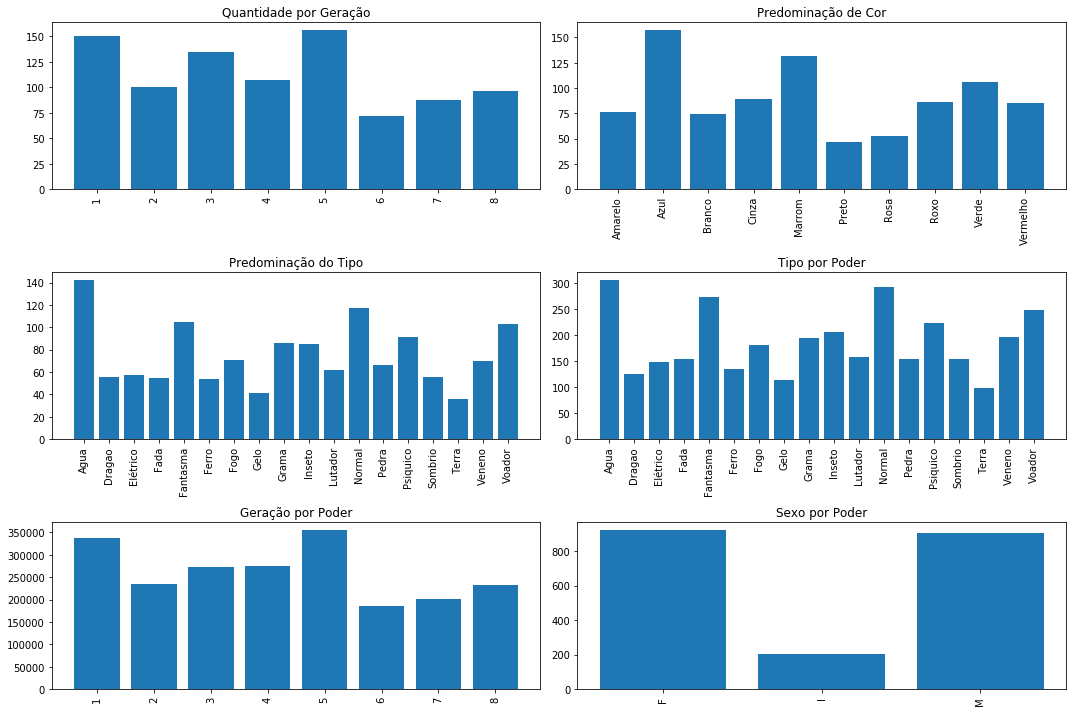

In [90]:
plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
plt.bar(graf_geracao.index,graf_geracao.values)
plt.title('Quantidade por Geração')
plt.xticks(rotation=90)

plt.subplot(3,2,2)
plt.bar(graf_cor.index,graf_cor.values)
plt.title('Predominação de Cor')
plt.xticks(rotation=90)

plt.subplot(3,2,3)
plt.bar(graf_tipo.index,graf_tipo.values)
plt.title('Predominação do Tipo')
plt.xticks(rotation=90)

plt.subplot(3,2,4)
plt.bar(graf_poder_tipo.index,graf_poder_tipo.values)
plt.title('Tipo por Poder')
plt.xticks(rotation=90)

plt.subplot(3,2,5)
plt.bar(graf_poder_geracao.index,graf_poder_geracao.values)
plt.title('Geração por Poder')
plt.xticks(rotation=90)

plt.subplot(3,2,6)
plt.bar(graf_sexo.index,graf_sexo.values)
plt.title('Sexo por Poder')
plt.xticks(rotation=90)

plt.tight_layout()

_Com a análise dos gráficos acima, podemos indicar que se o treinador procurar por Pokémons da 5º geração do tipo água do sexo masculino ou feminino, ele terá mais chances de encontrar Pokémons com maiores poderes. Para analisar melhor esse achado, vamos continuar explorando com perguntas a 5ª geração._

## GRAFICO DE PIZZA

* 7 – Qual a porcentagem de Pokémons do tipo AGUA que possuem duas habilidades?

In [91]:
total_hab_1 = pokemons[['Nome']].loc[((pokemons['Geracao'] == 5) & (pokemons['Tipo1'] == 'Agua'))].rename(columns={'Nome': 'Todos'}).drop_duplicates().count()
total_hab_2 = pokemons[['Nome']].loc[(pokemons['Habilidade1'].str.len() > 1) & (pokemons['Habilidade2'].str.len() < 1) & (pokemons['Geracao'] == 5)].rename(columns={'Nome': 'Hab'}).drop_duplicates().count()
total_hab_3 = pokemons[['Nome']].loc[(pokemons['Habilidade1'].str.len() > 1) & (pokemons['Habilidade2'].str.len() > 1) & (pokemons['Geracao'] == 5)].rename(columns={'Nome': 'Hab'}).drop_duplicates().count()
total_hab = pd.concat([total_hab_2,total_hab_3])
graf_hab = (total_hab / total_hab_1.values) * 100

* 8 – Qual a porcentagem de Pokémons do tipo AGUA que possuem habilidade oculta?

In [92]:
total_ocu_1 = pokemons[['Nome']].loc[((pokemons['Geracao'] == 5) & (pokemons['Tipo1'] == 'Agua'))].rename(columns={'Nome': 'Todos'}).drop_duplicates().count()
total_ocu_2 = pokemons[['Nome']].loc[(pokemons['HabilidadeOculta'].str.len() < 1) & (pokemons['Geracao'] == 5)].rename(columns={'Nome': 'Oculta'}).drop_duplicates().count()
total_ocu = pd.concat([total_ocu_1,total_ocu_2])
graf_ocu = (total_ocu / total_ocu_1.values) * 100

* 9 - Qual a porcentagem de Pokémons por sexo?

In [93]:
total = pokemons[['Sexo']].loc[(pokemons['Geracao'] == 5)].count()
total_sexo = pd.value_counts((pokemons[['Sexo']].loc[(pokemons['Geracao'] == 5)]).values.flatten())
frequencia = (total_sexo / total.values) * 100

* 10 – Temos mais Pokémons místicos ou lendários?

In [94]:
total = pokemons[['Nome']].loc[(pokemons['Geracao'] == 5)].rename(columns={'Nome': 'Todos'}).drop_duplicates().count()
lendario = pd.value_counts((pokemons[['Lendario']].loc[(pokemons['Geracao'] == 5 & pokemons['Lendario'])].rename(columns={'Lendario': 'L'})).values.flatten())
mistico = pd.value_counts((pokemons[['Mistico']].loc[(pokemons['Geracao'] == 5 & pokemons['Mistico'])].rename(columns={'Mistico': 'M'})).values.flatten())
pokemons_lm = pd.concat([total,lendario,mistico])
frequencia_lm = (pokemons_lm / total.values) * 100

* 11 – Quantos Pokémons do tipo agua são lendários ou misticos?

In [95]:
total = pokemons[['Nome']].loc[((pokemons['Geracao'] == 5) & (pokemons['Tipo1'] == 'Agua'))].rename(columns={'Nome': 'Todos'}).drop_duplicates().count()
lendario_5 = pd.value_counts((pokemons[['Lendario']].loc[((pokemons['Geracao'] == 5) & (pokemons['Lendario']) & (pokemons['Tipo1'] == 'Agua'))].rename(columns={'Lendario': 'L'})).values.flatten())
if (lendario_5.count() == 0) : lendario_5.loc['True'] = 0
mistico_5 = pd.value_counts((pokemons[['Mistico']].loc[((pokemons['Geracao'] == 5) & (pokemons['Mistico']) & (pokemons['Tipo1'] == 'Agua'))].rename(columns={'Mistico': 'M'})).values.flatten())
if (mistico_5.count() == 0) : mistico_5.loc['True'] = 0
pokemons_lm_5 = pd.concat([total,lendario_5,mistico_5])
frequencia_lm_5 = (pokemons_lm_5 / total.values) * 100

* 12 – Quantos Pokémons do tipo agua possuimos na 5ª geração?

In [96]:
total = pokemons[['Nome']].loc[((pokemons['Geracao'] == 5))].rename(columns={'Nome': 'Todos'}).drop_duplicates().count()
agua = pd.value_counts((pokemons[['Tipo1']].loc[((pokemons['Geracao'] == 5) & (pokemons['Tipo1'] == 'Agua'))].values.flatten()))
pokemons_agua = pd.concat([total,agua])
frequencia_agua = (pokemons_agua / total.values) * 100

* 13 – Quantos Pokémons do tipo agua mistico possuem duas habilidades?

In [97]:
m_total_hab_1 = pokemons[['Nome']].loc[((pokemons['Geracao'] == 5) & (pokemons['Tipo1'] == 'Agua') & (pokemons['Mistico']))].rename(columns={'Nome': 'Todos'}).drop_duplicates().count()
m_total_hab_2 = pokemons[['Nome']].loc[(pokemons['Habilidade1'].str.len() > 1) & (pokemons['Habilidade2'].str.len() < 1) & (pokemons['Geracao'] == 5)].rename(columns={'Nome': 'Hab'}).drop_duplicates().count()
m_total_hab_3 = pokemons[['Nome']].loc[(pokemons['Habilidade1'].str.len() > 1) & (pokemons['Habilidade2'].str.len() > 1) & (pokemons['Geracao'] == 5)].rename(columns={'Nome': 'Hab'}).drop_duplicates().count()
m_total_hab = pd.concat([total_hab_2,total_hab_3])
m_graf_hab = (total_hab / total_hab_1.values) * 100

* 14 – Quantos Pokémons do tipo agua mistico possuem habilidades ocultas?

In [98]:
m_total_ocu_1 = pokemons[['Nome']].loc[((pokemons['Geracao'] == 5) & (pokemons['Tipo1'] == 'Agua') & (pokemons['Mistico']))].rename(columns={'Nome': 'Todos'}).drop_duplicates().count()
m_total_ocu_2 = pokemons[['Nome']].loc[(pokemons['HabilidadeOculta'].str.len() < 1) & (pokemons['Geracao'] == 5)].rename(columns={'Nome': 'Oculta'}).drop_duplicates().count()
m_total_ocu = pd.concat([total_ocu_1,total_ocu_2])
m_graf_ocu = (total_ocu / total_ocu_1.values) * 100

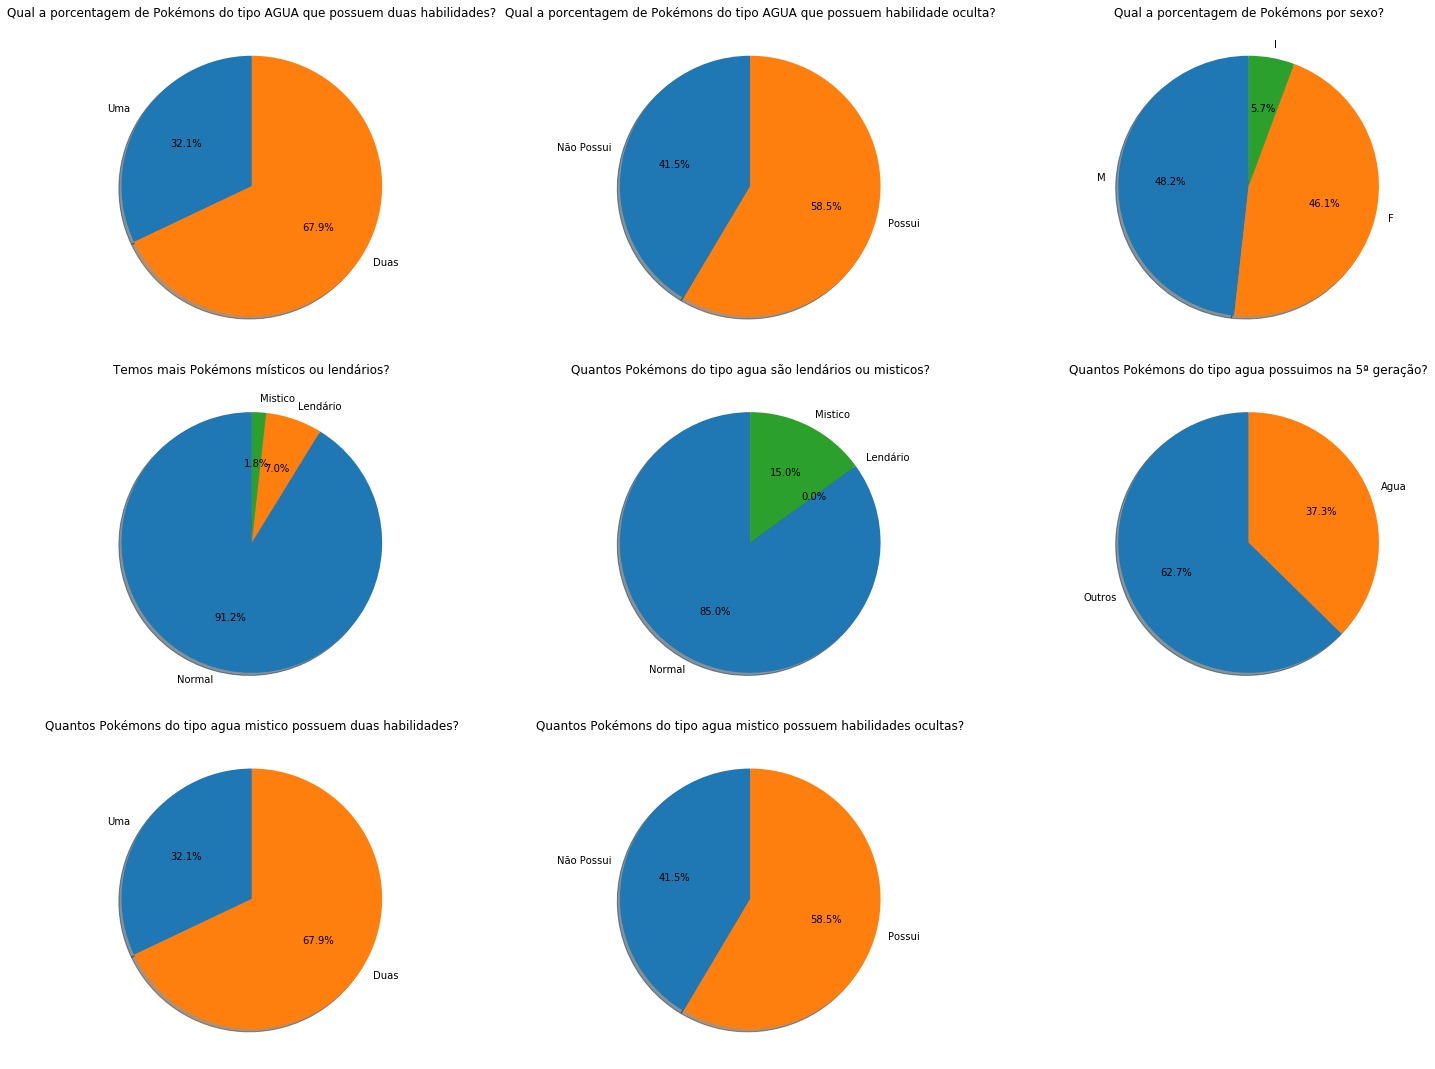

In [99]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.pie(graf_hab.values, labels = ['Uma', 'Duas'], autopct='%1.1f%%', shadow=True, startangle=90) 
plt.title('Qual a porcentagem de Pokémons do tipo AGUA que possuem duas habilidades?')

plt.subplot(3,3,2)
plt.pie(graf_ocu.values, labels = ['Não Possui', 'Possui'], autopct='%1.1f%%', shadow=True, startangle=90) 
plt.title('Qual a porcentagem de Pokémons do tipo AGUA que possuem habilidade oculta?')

plt.subplot(3,3,3)
plt.pie(frequencia.values, labels = frequencia.index, autopct='%1.1f%%', shadow=True, startangle=90) 
plt.title('Qual a porcentagem de Pokémons por sexo?')

plt.subplot(3,3,4)
plt.pie(frequencia_lm.values, labels = ['Normal','Lendário', 'Mistico'], autopct='%1.1f%%', shadow=True, startangle=90) 
plt.title('Temos mais Pokémons místicos ou lendários?')

plt.subplot(3,3,5)
plt.pie(frequencia_lm_5.values, labels = ['Normal','Lendário', 'Mistico'], autopct='%1.1f%%', shadow=True, startangle=90) 
plt.title('Quantos Pokémons do tipo agua são lendários ou misticos?')

plt.subplot(3,3,6)
plt.pie(frequencia_agua.values, labels = ['Outros','Agua'], autopct='%1.1f%%', shadow=True, startangle=90) 
plt.title('Quantos Pokémons do tipo agua possuimos na 5ª geração?')

plt.subplot(3,3,7)
plt.pie(m_graf_hab.values, labels = ['Uma', 'Duas'], autopct='%1.1f%%', shadow=True, startangle=90) 
plt.title('Quantos Pokémons do tipo agua mistico possuem duas habilidades?')

plt.subplot(3,3,8)
plt.pie(m_graf_ocu.values, labels = ['Não Possui', 'Possui'], autopct='%1.1f%%', shadow=True, startangle=90) 
plt.title('Quantos Pokémons do tipo agua mistico possuem habilidades ocultas?')

plt.tight_layout()

_A chance de um treinador pegar um Pokémon da 5ª Geração do sexo indeterminado é de menos de 6%. Dentro dessa geração não temos muitos Pokémons misticos ou lendários, pois essa porcentagem é menor que 10%. Possuimos quase 70% dos Pokémons com duas habilidades. Também podemos encontrar nessa geração Pokémon do tipo agua mistico, em uma porcentagem de 15%, bem desafiadora, mas que seria um excelente achado._

# Correlação de Pearson

In [100]:
pokemon_l1 = (pokemons[['Total','HP','Ataque','Defesa','Rapidez','Peso','Tamanho']].loc[(pokemons['Level'] == 1)]).corr(method='pearson')
pokemon_l1.style.background_gradient(cmap='coolwarm')

,Total,HP,Ataque,Defesa,Rapidez,Peso,Tamanho
Total,1.000000,0.655817,0.728692,0.629123,0.530550,0.462768,0.536547
HP,0.655817,1.000000,0.474047,0.285075,0.161829,0.469300,0.506782
Ataque,0.728692,0.474047,1.000000,0.455541,0.346039,0.406994,0.389108
Defesa,0.629123,0.285075,0.455541,1.000000,-0.015944,0.458429,0.395836
Rapidez,0.530550,0.161829,0.346039,-0.015944,1.000000,0.014998,0.195985
Peso,0.462768,0.469300,0.406994,0.458429,0.014998,1.000000,0.626021
Tamanho,0.536547,0.506782,0.389108,0.395836,0.195985,0.626021,1.000000


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

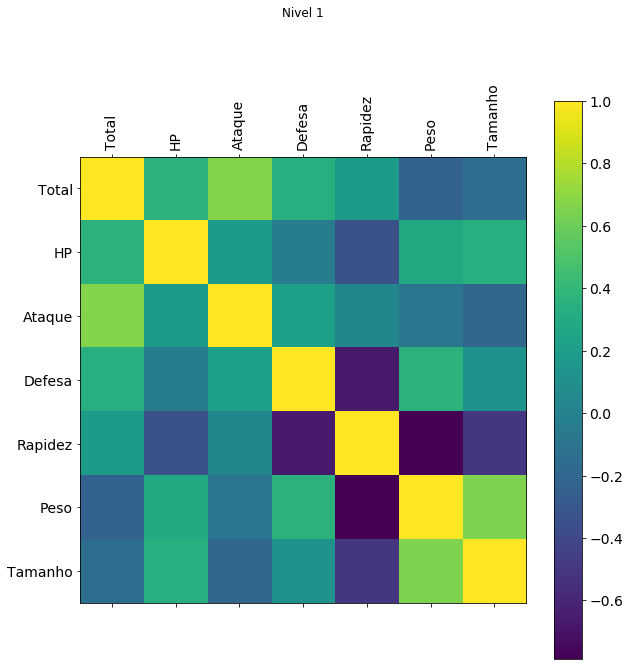

In [101]:
plt.matshow(pokemon_l1.corr(method='pearson'),fignum=(plt.figure(figsize=(10, 10))).number)
plt.xticks(range(pokemon_l1.select_dtypes(['number']).shape[1]), pokemon_l1.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(pokemon_l1.select_dtypes(['number']).shape[1]), pokemon_l1.select_dtypes(['number']).columns, fontsize=14)
(plt.colorbar()).ax.tick_params(labelsize=14)
plt.title('Nivel 1', y=1.3)
plt.xticks(rotation=90)

In [102]:
pokemon_l50 = (pokemons[['Total','HP','Ataque','Defesa','Rapidez','Peso','Tamanho']].loc[(pokemons['Level'] == 50)]).corr(method='pearson')
pokemon_l50.style.background_gradient(cmap='coolwarm')

,Total,HP,Ataque,Defesa,Rapidez,Peso,Tamanho
Total,1.000000,0.656779,0.718145,0.627196,0.526177,0.465369,0.540874
HP,0.656779,1.000000,0.478674,0.278946,0.172263,0.457716,0.492229
Ataque,0.718145,0.478674,1.000000,0.446892,0.325549,0.416236,0.396556
Defesa,0.627196,0.278946,0.446892,1.000000,-0.023177,0.457759,0.397375
Rapidez,0.526177,0.172263,0.325549,-0.023177,1.000000,0.019572,0.204275
Peso,0.465369,0.457716,0.416236,0.457759,0.019572,1.000000,0.626088
Tamanho,0.540874,0.492229,0.396556,0.397375,0.204275,0.626088,1.000000


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

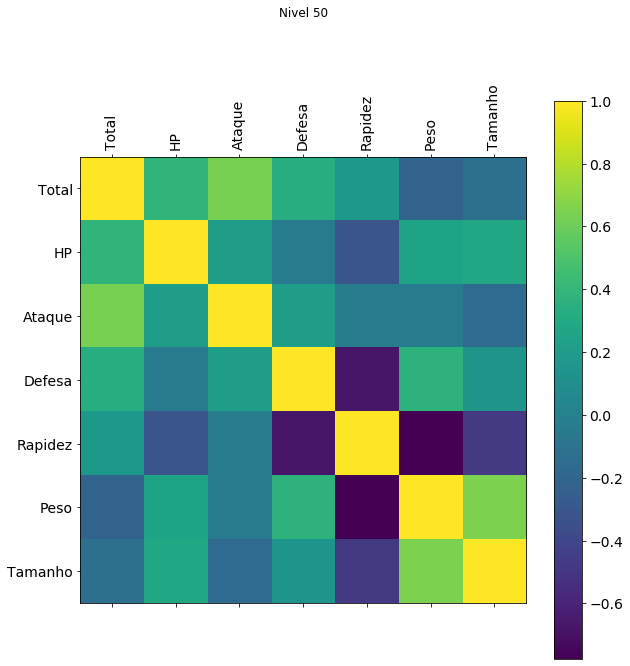

In [103]:
plt.matshow(pokemon_l50.corr(method='pearson'),fignum=(plt.figure(figsize=(10, 10))).number)
plt.xticks(range(pokemon_l50.select_dtypes(['number']).shape[1]), pokemon_l50.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(pokemon_l50.select_dtypes(['number']).shape[1]), pokemon_l50.select_dtypes(['number']).columns, fontsize=14)
(plt.colorbar()).ax.tick_params(labelsize=14)
plt.title('Nivel 50', y=1.3)
plt.xticks(rotation=90)

In [104]:
pokemon_l100 = (pokemons[['Total','HP','Ataque','Defesa','Rapidez','Peso','Tamanho']].loc[(pokemons['Level'] == 100)]).corr(method='pearson')
pokemon_l100.style.background_gradient(cmap='coolwarm')

,Total,HP,Ataque,Defesa,Rapidez,Peso,Tamanho
Total,1.000000,0.696697,0.635193,0.536938,0.465760,0.387417,0.454973
HP,0.696697,1.000000,0.214689,0.114761,0.093985,0.145840,0.165086
Ataque,0.635193,0.214689,1.000000,0.445978,0.335646,0.416040,0.398780
Defesa,0.536938,0.114761,0.445978,1.000000,-0.017758,0.464619,0.400900
Rapidez,0.465760,0.093985,0.335646,-0.017758,1.000000,0.020172,0.203885
Peso,0.387417,0.145840,0.416040,0.464619,0.020172,1.000000,0.626088
Tamanho,0.454973,0.165086,0.398780,0.400900,0.203885,0.626088,1.000000


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

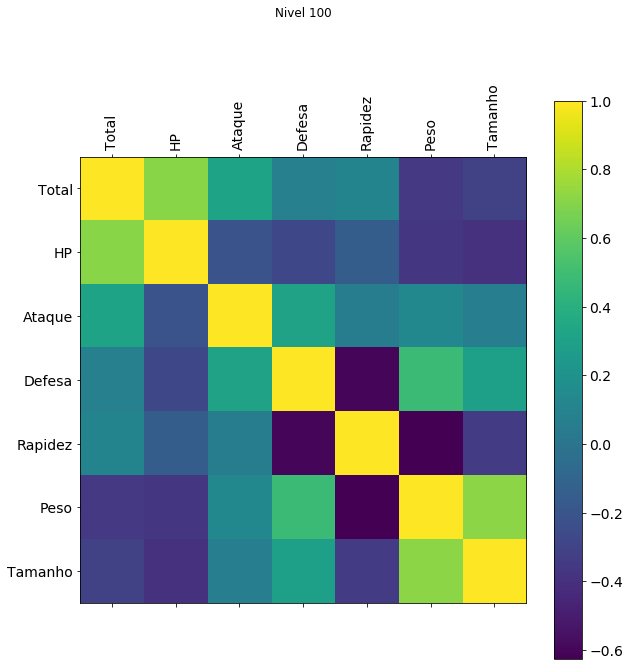

In [105]:
plt.matshow(pokemon_l100.corr(method='pearson'),fignum=(plt.figure(figsize=(10, 10))).number)
plt.xticks(range(pokemon_l100.select_dtypes(['number']).shape[1]), pokemon_l100.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(pokemon_l100.select_dtypes(['number']).shape[1]), pokemon_l100.select_dtypes(['number']).columns, fontsize=14)
(plt.colorbar()).ax.tick_params(labelsize=14)
plt.title('Nivel 100', y=1.3)
plt.xticks(rotation=90)

_Foi calculado o coeficiente de Pearson entre as colunas TOTAL, HP, ATAQUE, DEFESA, RAPIDEZ, PESO e TAMANHO. Com isso foi possivel chegar a algumas conclusões. A corelação entre as estatisticas de combate não modificam muito entre os níveis do Pokémon (1, 50 ou 100), dessa forma, podemos entender que quanto maior o nível do Pokémon maior será sua força geral. O TOTAL possui uma correlação maior e positiva entre HP, ATAQUE, DEFESA e RAPIDEZ, isso acontece, pois esse valor é a soma das estatisticas de combate. Outras relações positivas, porém com menor correlação, aparecem entre ATAQUE e DEFESA, DEFESA e PESO, RAPIDEZ e ATAQUE, dessa forma podemos concluir, por exemplo, que um Pokémon que possua uma RAPIDEZ mais elevada possuira um ATAQUE mais preciso. Podemos notar também uma correlação forte entre PESO e TAMANHO, porém temos uma correlação muito fraca entre o TAMANHO e PESO do Pokemon com a sua RAPIDEZ, dessa forma, não podemos concluir que essas variaveis possuem um impacto direto na velocidade do Pokémon dentro da batalha._

## NUVEM DE PALAVRAS

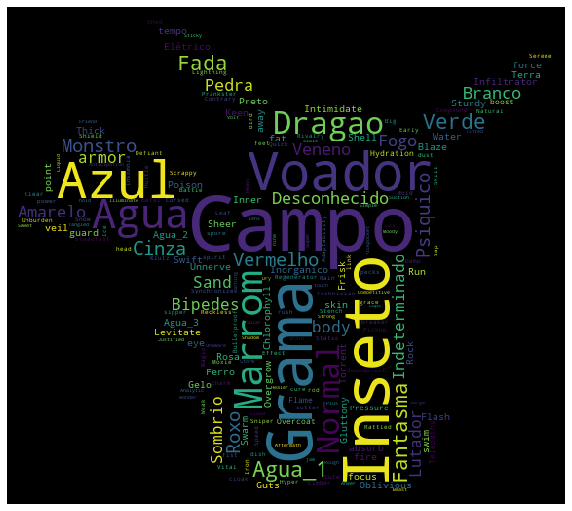

In [106]:
pokemons_palavras = pd.concat([pokemons[['Nome']].rename(columns={'Nome': 'P'}),pokemons[['Cor']].rename(columns={'Cor': 'P'}),pokemons[['OvoTipo1']].rename(columns={'OvoTipo1': 'P'}),pokemons[['OvoTipo2']].rename(columns={'OvoTipo2': 'P'}),pokemons[['Tipo1']].rename(columns={'Tipo1': 'P'}),pokemons[['Tipo2']].rename(columns={'Tipo2': 'P'}),pokemons[['Habilidade1']].rename(columns={'Habilidade1': 'P'}),pokemons[['Habilidade2']].rename(columns={'Habilidade2': 'P'}),pokemons[['HabilidadeOculta']].rename(columns={'HabilidadeOculta': 'P'})])
summary = pokemons_palavras.dropna(subset=['P'], axis=0)['P']
all_summary = " ".join(s for s in summary)
stopwords = set(STOPWORDS)
pikachu_mask = np.array(Image.open("pikachu.png"))
wordcloud = WordCloud(stopwords=stopwords,background_color="black",width=200, height=200, max_words=200,mask=pikachu_mask, max_font_size=400,min_font_size=1,collocations=False).generate(all_summary)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

_Vemos que a palavra que mais se destaca em todo o dataframe é CAMPO, dessa forma, é mais fácil concluirmos que achar um Pokémon do tipo campo (considerando todas as gerações) é mais fácil._

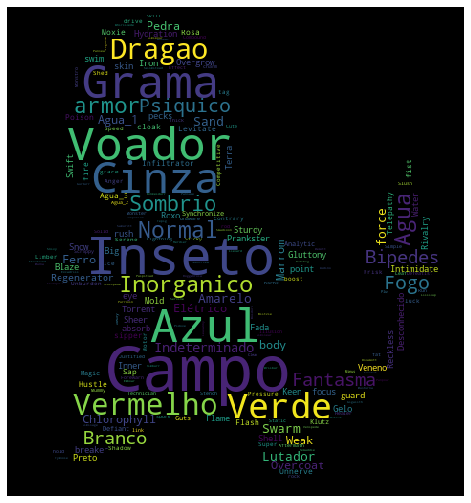

In [107]:
pokemons_stopwords5 = pokemons.loc[(pokemons['Geracao'] == 5)]
pokemons_palavras = pd.concat([pokemons_stopwords5[['Nome']].rename(columns={'Nome': 'P'}),pokemons_stopwords5[['Cor']].rename(columns={'Cor': 'P'}),pokemons_stopwords5[['OvoTipo1']].rename(columns={'OvoTipo1': 'P'}),pokemons_stopwords5[['OvoTipo2']].rename(columns={'OvoTipo2': 'P'}),pokemons_stopwords5[['Tipo1']].rename(columns={'Tipo1': 'P'}),pokemons_stopwords5[['Tipo2']].rename(columns={'Tipo2': 'P'}),pokemons_stopwords5[['Habilidade1']].rename(columns={'Habilidade1': 'P'}),pokemons_stopwords5[['Habilidade2']].rename(columns={'Habilidade2': 'P'}),pokemons_stopwords5[['HabilidadeOculta']].rename(columns={'HabilidadeOculta': 'P'})])
summary = pokemons_palavras.dropna(subset=['P'], axis=0)['P']
all_summary = " ".join(s for s in summary)
stopwords = set(STOPWORDS)
pikachu_mask = np.array(Image.open("charmander.png"))
wordcloud = WordCloud(stopwords=stopwords,background_color="black",width=200, height=200, max_words=200,mask=pikachu_mask, max_font_size=400,min_font_size=1,collocations=False).generate(all_summary)
fig, ax = plt.subplots(figsize=(9,9))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

_Conforme vimos acima, encontrar Pokémons do tipo água na 5ª Geração teremos chances de conseguir os Pokémons com maiores poderes, porém analisando a nuvem de palavras dessa mesma geração, podemos identifica que não será tão facil encontrar desse tipo, visto que nessa geração ainda temos como predominancia o tipo CAMPO e posteriormente INSETO._

## SÉRIE TEMPORAL

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDB6BF1E88>,
      dtype=object)

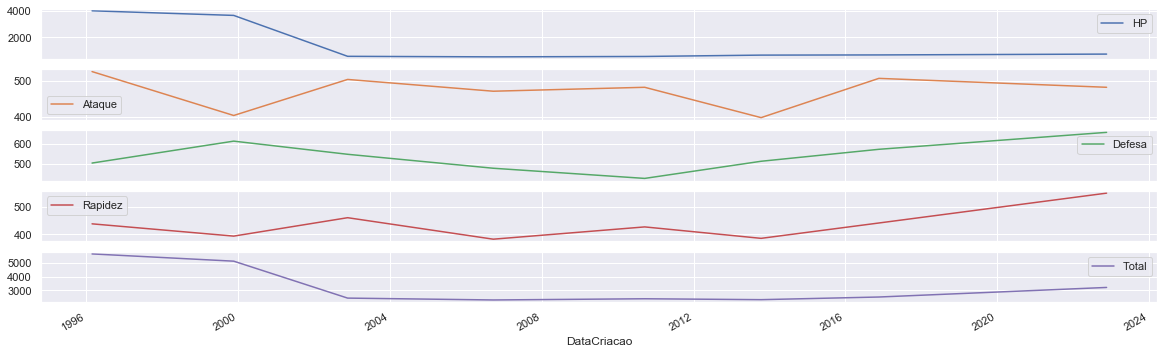

In [108]:
pokemon_temporal = pokemons[['DataCriacao','HP','Ataque','Defesa','Rapidez','Total']].loc[(pokemons['Level'] == 100)].groupby('DataCriacao').max()
pokemon_temporal
sns.set()
pokemon_temporal.plot(subplots = True, figsize = (20, 6))

_Atraves da analise temporal, dos valores máximos das estatisticas de batalha, conseguimos identificar quanto mais atual o Pokémon mais suas estastiticas de batalha aumentam, porém temos uma excessão que é o HP, onde as primeiras gerações possuiam um valor maior._

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDB692F048>,
      dtype=object)

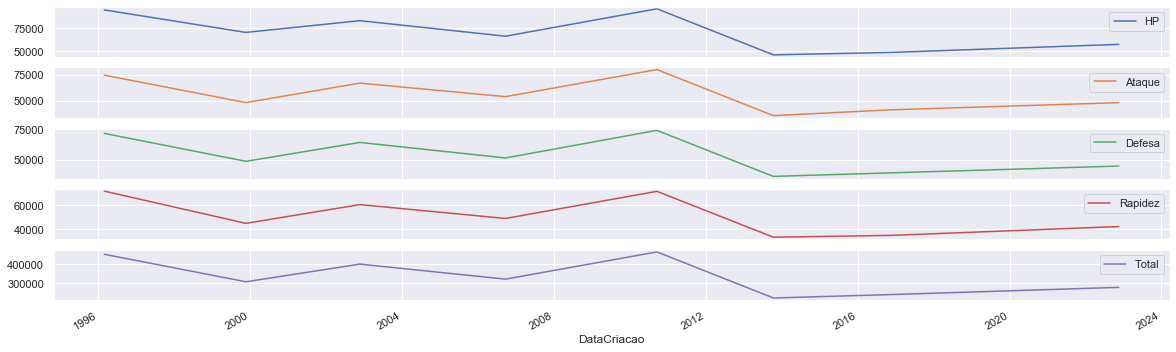

In [109]:
pokemon_temporal = pokemons[['DataCriacao','HP','Ataque','Defesa','Rapidez','Total']].loc[(pokemons['Level'] == 100)].groupby('DataCriacao').sum()
pokemon_temporal
sns.set()
pokemon_temporal.plot(subplots = True, figsize = (20, 6))

_Atraves da soma dos valores das estatiscas, podemos afirmar o que foi falado anteriormente, que os Pokémons da 5º geração possuem estatisticas mais ateuanas que as outras gerações. Veja que o pico de todas as estatisticas é em meados de 2010, ano de criação da 5ª geração._

## GRÁFICO DE DISPERSÃO

<Figure size 936x576 with 0 Axes>

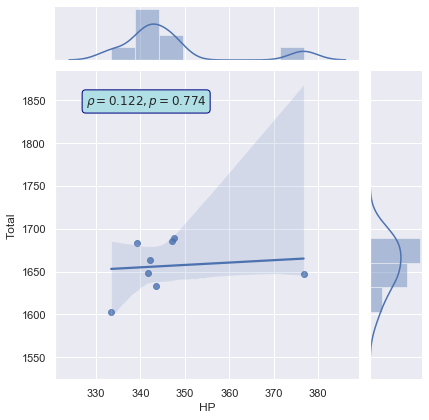

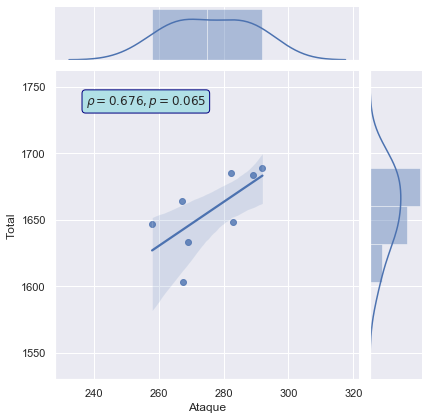

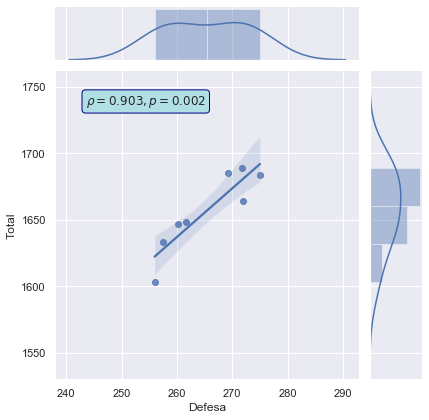

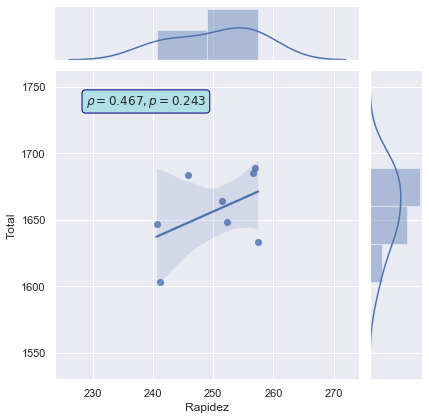

In [163]:
pokemon_temporal = pokemons[['DataCriacao','HP','Ataque','Defesa','Rapidez','Total']].loc[(pokemons['Level'] == 100)].groupby('DataCriacao').mean()
pokemon_temporal

nvars=['HP','Ataque','Defesa','Rapidez']
rt=['Total']

fig = plt.figure(figsize=(13,8))
gs = gridspec.GridSpec(len(rt),len(nvars))

for i, idxs in enumerate(itertools.product(rt, nvars)):
    nrt, nvar = idxs
    g=sns.jointplot(data=pokemon_temporal, y=nrt, x=nvar,kind = 'reg')#, space=0,ax=axs[idx_rt,idx_var])
    r, p = stats.pearsonr(pokemon_temporal[nrt], pokemon_temporal[nvar])
    g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',xy=(0.1, 0.9), xycoords='axes fraction',ha='left', va='center',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

plt.show()

_O grafico de dispersão, atráves da média, baseado no TOTAL, que é a soma de todas as estatiscas, confirma a correção, onde tivemos um aumento consideravel na seguinte ordem: Defesa, Ataque e Rapidez, tivemos aumento também no HP, porem de uma forma menos assentuada. Dessa forma, podemos concluir para um treinador Pokémon que quanto maior a geração do Pokémon mais forte ele é, porém eles possuem menor resistencia para a batalha (HP) comparado com as primeiras gerações._

## LENDÁRIO

_Existe uma teoria que os Pokémons lendários não são diferentes em poder quanto os outros Pokémons, sendo assim, não vale muita a pena a dificuldade de procurá-los, mas esse é um ponto que vamos nos aprofundar atraves do Machine Learning._

### pokemons_lendario

In [111]:
pokemons_lendario = pokemons[['TotalAtaque','TotalDefesa','Lendario']].loc[(pokemons['Level'] == 100)]
pokemons_lendario['Lendario'] = (pokemons_lendario['Lendario']).astype(int)
pokemons_lendario.head()

,TotalAtaque,TotalDefesa,Lendario
Numero,,,
1,467,467,0
1,467,467,0
2,529,531,0
2,529,531,0
3,617,619,0


Text(0, 0.5, 'Defesa')

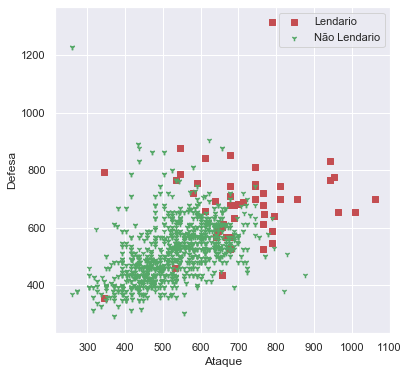

In [112]:
positivo = pokemons_lendario.loc[(pokemons_lendario['Lendario'] == 1)]
negativo = pokemons_lendario.loc[(pokemons_lendario['Lendario'] == 0)]
fig,graf = plt.subplots(figsize=(6,6))
graf.scatter(positivo['TotalAtaque'],positivo['TotalDefesa'],s=30,c='r',marker='s',label='Lendario')
graf.scatter(negativo['TotalAtaque'],negativo['TotalDefesa'],s=30,c='g',marker='1',label='Não Lendario')
graf.legend()
graf.set_xlabel('Ataque')
graf.set_ylabel('Defesa')

_Podemos ver, salvo poucas exeções, que os Pokémons lendários possuem maior defesa e ataque dos que os Pokémons não lendários. Não conseguimos traçar uma linha 100% reta, mas chega bem próximo disso. Porém com esse gráfico conseguimos desmistificar que a teoria que Pokémons lendários não possuem poderes diferenciados, sendo assim, podemos falar a um treinador de Pokémons, que se a sua procura for por poder e defesa, ele pode buscar isso entre os Pokémons lendários._

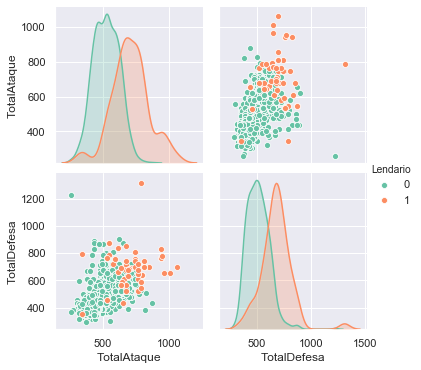

In [113]:
sns.pairplot(pokemons_lendario.dropna(), vars=['TotalAtaque','TotalDefesa'], hue='Lendario', palette="Set2");

_Através desse gráfico conseguimos provar o que o gráfico de dispersão acima nos confirmou: a teoria de que Pokémons lendários não são diferentes em poder não é verdadeira, pois em sua grande maioria, os Pokémons lendários possuem ataques e defesas superiores._

# MACHINE LEARNING

### ALVO

In [114]:
pokemons_ml = pokemons[['Tipo1','Geracao','Sexo','Tamanho','Peso','Level','Total','OvoTipo1','Habilidade1']].rename(columns={'Tipo1':'Tipo'})
pokemons_ml.head()

,Tipo,Geracao,Sexo,Tamanho,Peso,Level,Total,OvoTipo1,Habilidade1
Numero,,,,,,,,,
1,Grama,1,M,0.7,6.9,1,318,Monstro,Overgrow
1,Grama,1,M,0.7,6.9,50,736,Monstro,Overgrow
1,Grama,1,M,0.7,6.9,100,1435,Monstro,Overgrow
1,Grama,1,F,0.7,6.9,1,318,Monstro,Overgrow
1,Grama,1,F,0.7,6.9,50,736,Monstro,Overgrow


_Para os modelos de Machine Learning darei continuidade a análise que idenfitiquei acima: se o treinador procurar por Pokémons da 5º geração do tipo água do sexo masculino ou feminino, ele terá mais chances de encontrar Pokémons com maiores poderes. Atraves dos dados GERACAO, SEXO, TAMANHO, PESO, LEVEL, TOTAL, OVOTIPO e HABILIDADE montarei os modelos de Machine Learning para prever se o Pokémon é do tipo: AGUA ou OUTROS, esse é o nosso ALVO. OBS.: Minha ideia era utilizar somente a 5ª geração como dados, porém como temos poucas informações, os modelos não ficaram tão acertivos, por isso a geração foi colocada como uma variavel do modelo e todos os Pokémons foram considerados._

## CLASSIFICAÇÃO

### TIPO

In [115]:
pokemons_ml.loc[pokemons_ml['Tipo'] == 'Agua','Tipo'] = 1
pokemons_ml.loc[pokemons_ml['Tipo'] == 1].head()

,Tipo,Geracao,Sexo,Tamanho,Peso,Level,Total,OvoTipo1,Habilidade1
Numero,,,,,,,,,
7,1,1,F,0.5,9.0,50,732,Monstro,Torrent
7,1,1,F,0.5,9.0,100,1427,Monstro,Torrent
7,1,1,F,0.5,9.0,1,314,Monstro,Torrent
7,1,1,M,0.5,9.0,1,314,Monstro,Torrent
7,1,1,M,0.5,9.0,50,732,Monstro,Torrent


In [116]:
pokemons_ml.loc[pokemons_ml['Tipo'] != 1,'Tipo'] = 0
pokemons_ml.loc[pokemons_ml['Tipo'] == 0].head()

,Tipo,Geracao,Sexo,Tamanho,Peso,Level,Total,OvoTipo1,Habilidade1
Numero,,,,,,,,,
1,0,1,M,0.7,6.9,1,318,Monstro,Overgrow
1,0,1,M,0.7,6.9,50,736,Monstro,Overgrow
1,0,1,M,0.7,6.9,100,1435,Monstro,Overgrow
1,0,1,F,0.7,6.9,1,318,Monstro,Overgrow
1,0,1,F,0.7,6.9,50,736,Monstro,Overgrow


In [117]:
pokemons_ml['Tipo'] = pokemons_ml['Tipo'].astype(int)
pokemons_ml.head()

,Tipo,Geracao,Sexo,Tamanho,Peso,Level,Total,OvoTipo1,Habilidade1
Numero,,,,,,,,,
1,0,1,M,0.7,6.9,1,318,Monstro,Overgrow
1,0,1,M,0.7,6.9,50,736,Monstro,Overgrow
1,0,1,M,0.7,6.9,100,1435,Monstro,Overgrow
1,0,1,F,0.7,6.9,1,318,Monstro,Overgrow
1,0,1,F,0.7,6.9,50,736,Monstro,Overgrow


_Esse será o tipo binário, pois quero separar os Pokémons entre AGUA e OUTROS, dessa forma, todos os tipos de Pokémon diferente de AGUA recebem 0 e os do tipo AGUA recebem 1._

### SEXO

In [118]:
pokemons_ml['Sexo'] = pokemons_ml['Sexo'].replace('M',1)
pokemons_ml['Sexo'] = pokemons_ml['Sexo'].replace('F',2)
pokemons_ml['Sexo'] = pokemons_ml['Sexo'].replace('I',3)
pokemons_ml.head()

,Tipo,Geracao,Sexo,Tamanho,Peso,Level,Total,OvoTipo1,Habilidade1
Numero,,,,,,,,,
1,0,1,1,0.7,6.9,1,318,Monstro,Overgrow
1,0,1,1,0.7,6.9,50,736,Monstro,Overgrow
1,0,1,1,0.7,6.9,100,1435,Monstro,Overgrow
1,0,1,2,0.7,6.9,1,318,Monstro,Overgrow
1,0,1,2,0.7,6.9,50,736,Monstro,Overgrow


### OVOTIPO

In [119]:
pokemons_ovotipo = pokemons_ml[['OvoTipo1']].drop_duplicates()
pokemons_ovotipo.insert(0,'OvoTipo', range(1, 1 + len(pokemons_ovotipo)))

pokemons_ml = pd.merge(pokemons_ml,pokemons_ovotipo,on='OvoTipo1').set_index(pokemons_ml.index)
pokemons_ml = pokemons_ml.drop('OvoTipo1', axis=1)

pokemons_ml.head()

,Tipo,Geracao,Sexo,Tamanho,Peso,Level,Total,Habilidade1,OvoTipo
Numero,,,,,,,,,
1,0,1,1,0.7,6.9,1,318,Overgrow,1
1,0,1,1,0.7,6.9,50,736,Overgrow,1
1,0,1,1,0.7,6.9,100,1435,Overgrow,1
1,0,1,2,0.7,6.9,1,318,Overgrow,1
1,0,1,2,0.7,6.9,50,736,Overgrow,1


In [120]:
del pokemons_ovotipo

### HABILIDADE

In [121]:
pokemons_habilidade = pokemons_ml[['Habilidade1']].drop_duplicates()
pokemons_habilidade.insert(0,'Habilidade', range(1, 1 + len(pokemons_habilidade)))

pokemons_ml = pd.merge(pokemons_ml,pokemons_habilidade,on='Habilidade1').set_index(pokemons_ml.index)
pokemons_ml = pokemons_ml.drop('Habilidade1', axis=1)

pokemons_ml.head()

,Tipo,Geracao,Sexo,Tamanho,Peso,Level,Total,OvoTipo,Habilidade
Numero,,,,,,,,,
1,0,1,1,0.7,6.9,1,318,1,1
1,0,1,1,0.7,6.9,50,736,1,1
1,0,1,1,0.7,6.9,100,1435,1,1
1,0,1,2,0.7,6.9,1,318,1,1
1,0,1,2,0.7,6.9,50,736,1,1


In [122]:
del pokemons_habilidade

In [123]:
pokemons_ml.dtypes

Tipo            int32
Geracao         int64
Sexo            int64
Tamanho       float64
Peso          float64
Level           int64
Total           int64
OvoTipo         int64
Habilidade      int64
dtype: object

_Para facilitar o trabalho e a analise dos modelos de Machine Learning estou transformando os textos em números. Além disso modelo de regressão logistica só trabalha com valores númericos._

## GRÁFICO PAIRPLOT

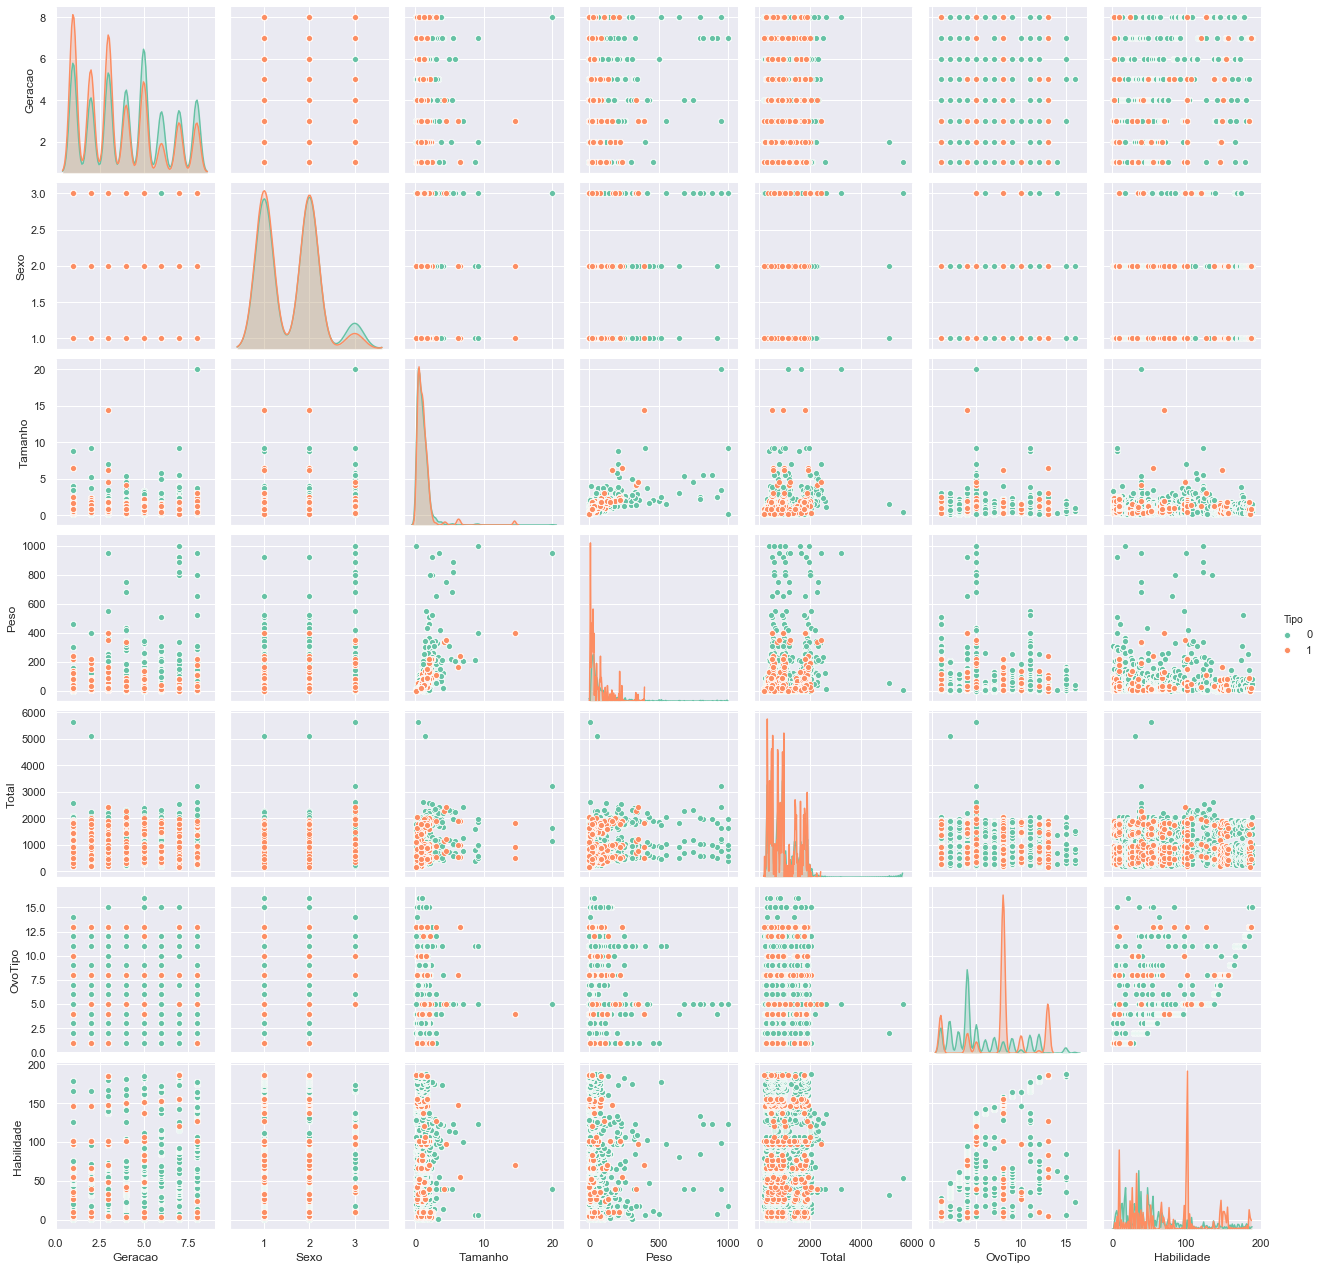

In [124]:
sns.pairplot(pokemons_ml.dropna(), vars=['Geracao','Sexo','Tamanho','Peso','Total','OvoTipo','Habilidade'], hue='Tipo', palette='Set2', diag_kws={'bw': 0.2});

_Utilizeio a biblioteca seaborn por ser uma das mais conhecidas e poderodas ferramentas de plotagem de gráficos no Python. Através dessa plotagem conseguimos visualizar melhor a correlação entre os Pokémons do tipo AGUA e OUTROS. Veja que para o dado SEXO, OVOTIPO e HABILIDADE a correlação é praticamente linear, pois só possuimos poucos tipos dentro dessas variáveis, já nas outras os dados são bem embaralhados mostrando que não possuimos uma correção linear forte entre eles._

## MAPA DE CALOR

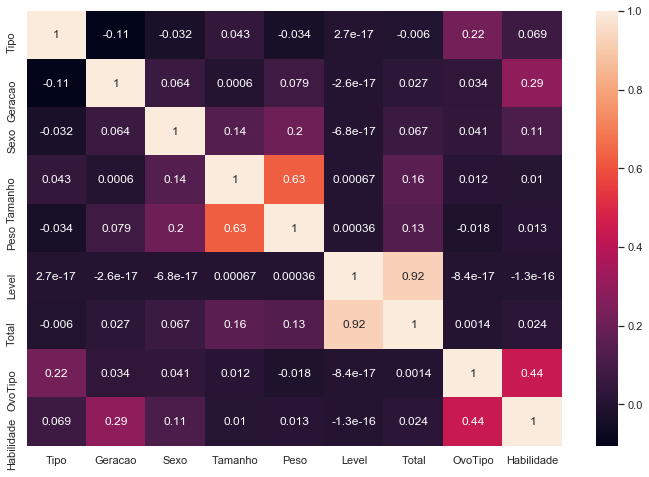

In [125]:
plt.figure(figsize=(12,8))
sns.heatmap(pokemons_ml.corr(),annot=True)

_Quanto mais claro maior a correção positiva, com esse grafico conseguimos provar o que falei acima, as correlações lineares não são muito fortes nesse dataframe. Para um modelo Machine Learning quanto mais as variáveis forem correlacionadas, menor sua performance, por isso o gráfico de calor é importante, pois conseguimos definir que não existe muitas correlações positivas._

## GRÁFICO DE BARRAS

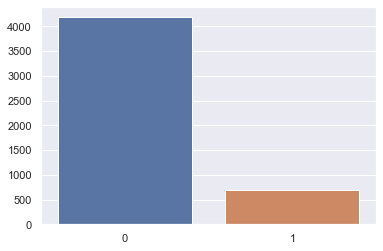

In [126]:
sns.barplot(x=pokemons_ml['Tipo'].value_counts().index,y=pokemons_ml['Tipo'].value_counts().values)

In [127]:
pokemons_ml['Tipo'].value_counts()

0    4185
1     702
Name: Tipo, dtype: int64

_O gráfico de barras aqui é util para verificarmos se o nosso dado binário está realmente dividido de forma correta. Com ele podemos concluir que possuimos a menor quantidade de Pokémons do tipo AGUA X OUTROS._

## ESCALONAMENTO DE DADOS

In [128]:
escalonamento = StandardScaler()

y_ml = pokemons_ml['Tipo']
x_ml = pokemons_ml.drop('Tipo', axis=1)

x_ml_esc = escalonamento.fit_transform(x_ml.values)
x_ml_esc = pd.DataFrame(x_ml_esc, index=x_ml.index, columns=x_ml.columns)
x_ml = x_ml_esc.copy()

x_ml.head()

,Geracao,Sexo,Tamanho,Peso,Level,Total,OvoTipo,Habilidade
Numero,,,,,,,,
1,-1.386193,-0.986663,-0.390745,-0.48604,-1.220600,-1.191339,-1.336754,-1.162484
1,-1.386193,-0.986663,-0.390745,-0.48604,-0.008247,-0.427165,-1.336754,-1.162484
1,-1.386193,-0.986663,-0.390745,-0.48604,1.228848,0.850724,-1.336754,-1.162484
1,-1.386193,0.625447,-0.390745,-0.48604,-1.220600,-1.191339,-1.336754,-1.162484
1,-1.386193,0.625447,-0.390745,-0.48604,-0.008247,-0.427165,-1.336754,-1.162484


In [129]:
del x_ml_esc

_Para o escalonamento dos dados estou utilizando biblioteca StandardScaler do sklearn, pois ela segue a distribuição normal padrão (SND). O escalonamento é importante para evitar distorções de escalas onde possuimos determinados valores muitos altos, muito baixos e decimais, essas variações prejudica muito a analise dos modelos. Podemos perceber que após o escalonamento os valores teremos escalas muito menores e muito mais parecidos, fazendo com que o algoritmo não de preferencia entre escalas maiores ou menores._

### BASES PARA TREINO E TESTE

In [130]:
x_ml_treino, x_ml_teste, y_ml_treino, y_ml_teste = train_test_split(x_ml, y_ml, test_size=0.3)

_Para separação dos dados utilizei a biblioteca train_test_split do sklearn. Primeiro por possuir uma sintaxe bem simples e intuitiva, além disso é a biblioteca mais popular e utilizada para montagem de bases de teste e treino. Nela estou classificando que 30% da minha base será de teste e 70% será utilizada para treinar meus modelos de machine learning._

### CURVA ROC

In [131]:
def plot_curva_roc(fper, tper, roc):
    plt.plot(fper, tper, color='red', label='Curva ROC (%0.2f)' % roc)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('FALSO POSITIVO')
    plt.ylabel('VERDADEIRO POSITIVO')
    plt.legend()
    plt.show()

## REGRESSÃO LOGÍSTICA

In [132]:
modelo_rl = LogisticRegression(random_state=0)

_Estou usando o modelo LogisticRegression da biblioteca Sklearn, que usa tecnica de classificação com saída de probabilidades de valores baseadas em uma variável categorica, que nesse caso é TIPO._

### TREINO

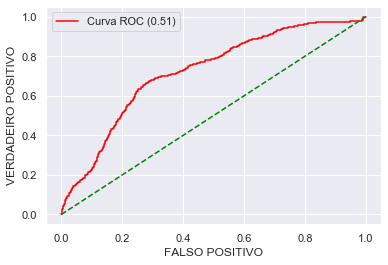

In [133]:
modelo_rl_treino = modelo_rl.fit(x_ml_treino,y_ml_treino)

proba_rl_treino = modelo_rl.predict_proba(x_ml_treino)
proba_rl_treino = proba_rl_treino[:,1]

pred_rl_treino = modelo_rl_treino.predict(x_ml_treino)

fper, tper, thresholds = roc_curve(y_ml_treino, proba_rl_treino)
plot_curva_roc(fper, tper, roc_auc_score(y_ml_treino, pred_rl_treino))

In [134]:
print(confusion_matrix(y_ml_treino, pred_rl_treino))

[[2920    7]
 [ 483   10]]


In [135]:
print(classification_report(y_ml_treino,pred_rl_treino,zero_division=0))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2927
           1       0.59      0.02      0.04       493

    accuracy                           0.86      3420
   macro avg       0.72      0.51      0.48      3420
weighted avg       0.82      0.86      0.80      3420



### TESTE

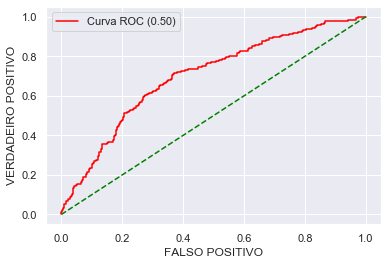

In [136]:
modelo_rl_teste = modelo_rl.fit(x_ml_teste,y_ml_teste)

proba_rl_teste = modelo_rl.predict_proba(x_ml_teste)
proba_rl_teste = proba_rl_teste[:,1]

pred_rl_teste = modelo_rl_teste.predict(x_ml_teste)

fper, tper, thresholds = roc_curve(y_ml_teste, proba_rl_teste)
plot_curva_roc(fper, tper, roc_auc_score(y_ml_teste, pred_rl_teste))

In [137]:
print(confusion_matrix(y_ml_teste, pred_rl_teste))

[[1258    0]
 [ 209    0]]


In [138]:
print(classification_report(y_ml_teste,pred_rl_teste,zero_division=0))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1258
           1       0.00      0.00      0.00       209

    accuracy                           0.86      1467
   macro avg       0.43      0.50      0.46      1467
weighted avg       0.74      0.86      0.79      1467



### COMPLETA

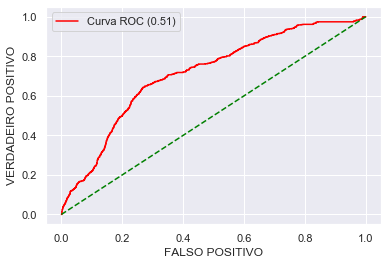

In [139]:
modelo_rl_full = modelo_rl.fit(x_ml,y_ml)

proba_rl_full = modelo_rl.predict_proba(x_ml)
proba_rl_full = proba_rl_full[:,1]

pred_rl_full = modelo_rl_full.predict(x_ml)

fper, tper, thresholds = roc_curve(y_ml, proba_rl_full)
plot_curva_roc(fper, tper, roc_auc_score(y_ml, pred_rl_full))

In [140]:
print(confusion_matrix(y_ml, pred_rl_full))

[[4176    9]
 [ 693    9]]


In [141]:
print(classification_report(y_ml, pred_rl_full,zero_division=0))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4185
           1       0.50      0.01      0.03       702

    accuracy                           0.86      4887
   macro avg       0.68      0.51      0.47      4887
weighted avg       0.81      0.86      0.79      4887



_Com esse modelo apesar de termos uma boa precisão para os Pokémons que não são do tipo AGUA, não obtivemos o mesmo ganho para o tipo AGUA, fazendo com que a curva ROC ficasse com score pouco acima de 50%. Estou usando a curva ROC para análise do modelo, pois é um gráfico muito bom para visualizarmos o quando o nosso modelo conseguiu distinguir entre duas coisas (classificação), no caso desse modelo entre os Pokémons tipo AGUA x OUTROS._

# ÁRVORE DE DECISÃO

In [142]:
modelo_arvore = ExtraTreesClassifier()

_Para esse modelo utilizarei a classe ExtraTreesClassifier da biblioteca Sklearn, pois ela cria um conjunto de dados aleatorio para a arvore de decisão._

## TREINO

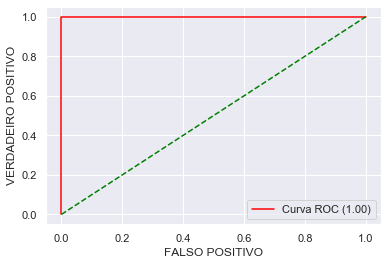

In [143]:
modelo_ad_treino = modelo_arvore.fit(x_ml_treino, y_ml_treino)

proba_ad_treino = modelo_ad_treino.predict_proba(x_ml_treino)
proba_ad_treino = proba_ad_treino[:,1]

pred_ad_treino = modelo_ad_treino.predict(x_ml_treino)

fper, tper, thresholds = roc_curve(y_ml_treino, proba_ad_treino)
plot_curva_roc(fper, tper, roc_auc_score(y_ml_treino, pred_ad_treino))

In [144]:
print(confusion_matrix(y_ml_treino, pred_ad_treino))

[[2927    0]
 [   0  493]]


In [145]:
print(classification_report(y_ml_treino, pred_ad_treino,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2927
           1       1.00      1.00      1.00       493

    accuracy                           1.00      3420
   macro avg       1.00      1.00      1.00      3420
weighted avg       1.00      1.00      1.00      3420



## TESTE

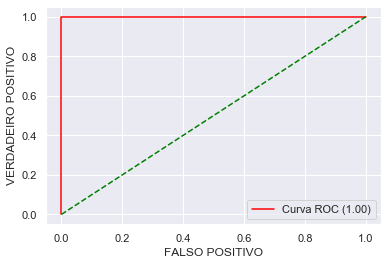

In [146]:
modelo_ad_teste = modelo_arvore.fit(x_ml_teste, y_ml_teste)

proba_ad_teste = modelo_ad_teste.predict_proba(x_ml_teste)
proba_ad_teste = proba_ad_teste[:,1]

pred_ad_teste = modelo_ad_teste.predict(x_ml_teste)

fper, tper, thresholds = roc_curve(y_ml_teste, proba_ad_teste)
plot_curva_roc(fper, tper, roc_auc_score(y_ml_teste, pred_ad_teste))

In [147]:
print(confusion_matrix(y_ml_teste, pred_ad_teste))

[[1258    0]
 [   0  209]]


In [148]:
print(classification_report(y_ml_teste, pred_ad_teste,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00       209

    accuracy                           1.00      1467
   macro avg       1.00      1.00      1.00      1467
weighted avg       1.00      1.00      1.00      1467



## COMPLETA

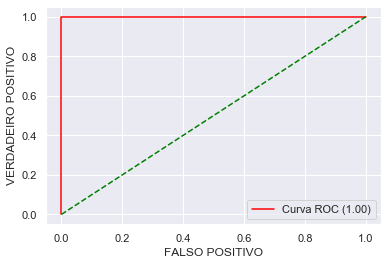

In [149]:
modelo_ad_full = modelo_arvore.fit(x_ml, y_ml)

proba_ad_full = modelo_ad_full.predict_proba(x_ml)
proba_ad_full = proba_ad_full[:,1]

pred_ad_full = modelo_ad_full.predict(x_ml)

fper, tper, thresholds = roc_curve(y_ml, proba_ad_full)
plot_curva_roc(fper, tper, roc_auc_score(y_ml, pred_ad_full))

In [150]:
print(confusion_matrix(y_ml, pred_ad_full))

[[4185    0]
 [   0  702]]


In [151]:
print(classification_report(y_ml, pred_ad_full,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4185
           1       1.00      1.00      1.00       702

    accuracy                           1.00      4887
   macro avg       1.00      1.00      1.00      4887
weighted avg       1.00      1.00      1.00      4887



_Com esse modelo conseguimos uma precisão excelente, onde foi possivel precisar 100% se o Pokémon é do tipo AGUA ou OUTRO. Através da curva ROC, podemos comprovar essa eficiencia, que ficou com o máximo de AUC._

In [152]:
pd.DataFrame({'Importancia': modelo_arvore.feature_importances_}, index=x_ml.columns).sort_values(by='Importancia', ascending=False)

,Importancia
OvoTipo,0.316378
Habilidade,0.270201
Peso,0.146555
Tamanho,0.115108
Geracao,0.089153
Total,0.049321
Sexo,0.011053
Level,0.002232


_Acima foi determinado a importancia de cada recurso (dado númerico) utilizado na árvore de decisão._

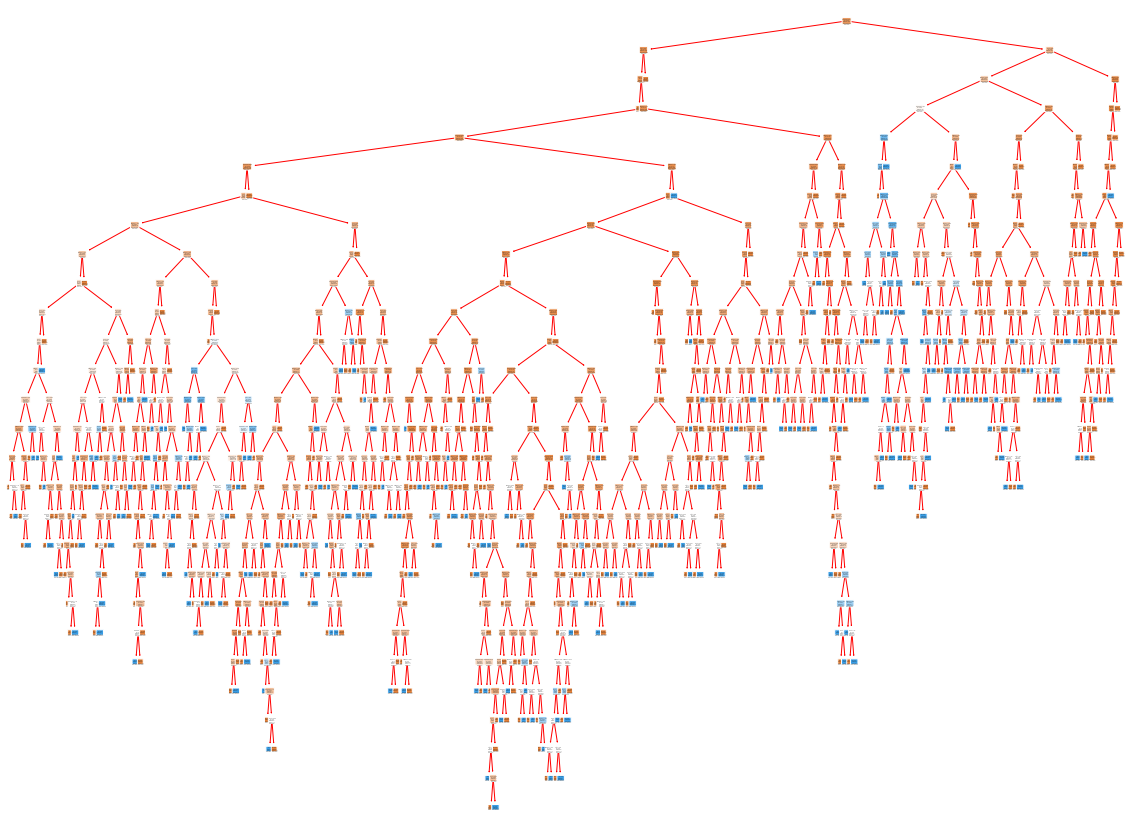

In [153]:
arvore_fig = plt.figure(figsize=(20,15))
arvore_fig = tree.plot_tree(modelo_arvore.estimators_[0], feature_names=x_ml.columns, class_names=pokemons_ml.columns, filled=True, impurity=True, rounded=True)
for arvore_arrow in arvore_fig:
    arrow = arvore_arrow.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(1)
plt.show()

_Com essa arvore de decisão conseguimos definir a partir de alguns aspectos do Pokémon se ele é do tipo AGUA ou OUTROS._

# REDES NEURAIS

_Para esse modelo estou usando a biblioteca Keras com TensorFlow, pois permite treinar modelos com várias camadas com poucas linhas de código e de maneira fácil._

## TREINO

Epoch 1/5
107/107 [==============================] - 3s 5ms/step - loss: 0.6658 - accuracy: 0.7137
Epoch 2/5
107/107 [==============================] - 1s 6ms/step - loss: 0.5797 - accuracy: 0.8558
Epoch 3/5
107/107 [==============================] - 1s 9ms/step - loss: 0.5017 - accuracy: 0.8558
Epoch 4/5
107/107 [==============================] - 1s 8ms/step - loss: 0.4537 - accuracy: 0.8558
Epoch 5/5
107/107 [==============================] - 1s 8ms/step


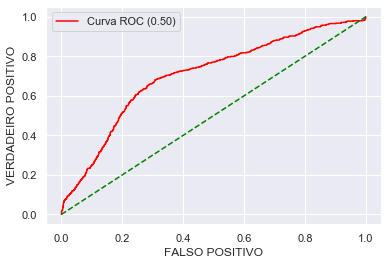

In [154]:
modelo_rn_treino = Sequential();
modelo_rn_treino.add(Dense(15,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml_treino.columns)))
modelo_rn_treino.add(Dense(7,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml_treino.columns)))
modelo_rn_treino.add(Dense(3,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml_treino.columns)))
modelo_rn_treino.add(Dense(3,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml_treino.columns)))
modelo_rn_treino.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml_treino.columns)))
modelo_rn_treino.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
modelo_rn_treino.fit(x_ml_treino,y_ml_treino,epochs=5, callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3))

pred_rn_treino = modelo_rn_treino.predict(x_ml_treino)
pred_rn_treino_one = pred_rn_treino.argmax(axis=1)

fper, tper, thresholds = roc_curve(y_ml_treino, pred_rn_treino)
plot_curva_roc(fper, tper, roc_auc_score(y_ml_treino, pred_rn_treino_one))

In [155]:
print(confusion_matrix(y_ml_treino, pred_rn_treino_one))

[[2927    0]
 [ 493    0]]


In [156]:
print(classification_report(y_ml_treino, pred_rn_treino_one,zero_division=0))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2927
           1       0.00      0.00      0.00       493

    accuracy                           0.86      3420
   macro avg       0.43      0.50      0.46      3420
weighted avg       0.73      0.86      0.79      3420



## TESTE

Epoch 1/5
46/46 [==============================] - 3s 8ms/step - loss: 0.6858 - accuracy: 0.6230
Epoch 2/5
46/46 [==============================] - 0s 9ms/step - loss: 0.6470 - accuracy: 0.8575
Epoch 3/5
46/46 [==============================] - 0s 9ms/step - loss: 0.6088 - accuracy: 0.8575
Epoch 4/5
46/46 [==============================] - 1s 13ms/step - loss: 0.5700 - accuracy: 0.8575
Epoch 5/5
46/46 [==============================] - 1s 13ms/step


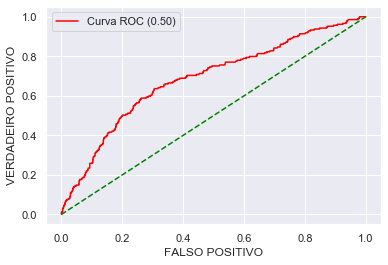

In [157]:
modelo_rn_teste = Sequential();
modelo_rn_teste.add(Dense(15,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml_teste.columns)))
modelo_rn_teste.add(Dense(7,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml_teste.columns)))
modelo_rn_teste.add(Dense(3,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml_teste.columns)))
modelo_rn_teste.add(Dense(3,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml_teste.columns)))
modelo_rn_teste.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml_teste.columns)))
modelo_rn_teste.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
modelo_rn_teste.fit(x_ml_teste,y_ml_teste,epochs=5, callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3))

pred_rn_teste = modelo_rn_teste.predict(x_ml_teste)
pred_rn_teste_one = pred_rn_teste.argmax(axis=1)

fper, tper, thresholds = roc_curve(y_ml_teste, pred_rn_teste)
plot_curva_roc(fper, tper, roc_auc_score(y_ml_teste, pred_rn_teste_one))

In [158]:
print(confusion_matrix(y_ml_teste, pred_rn_teste_one))

[[1258    0]
 [ 209    0]]


In [159]:
print(classification_report(y_ml_teste, pred_rn_teste_one,zero_division=0))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1258
           1       0.00      0.00      0.00       209

    accuracy                           0.86      1467
   macro avg       0.43      0.50      0.46      1467
weighted avg       0.74      0.86      0.79      1467



## COMPLETA

Epoch 1/5
153/153 [==============================] - 3s 7ms/step - loss: 0.6296 - accuracy: 0.8510
Epoch 2/5
153/153 [==============================] - 1s 5ms/step - loss: 0.5126 - accuracy: 0.8564
Epoch 3/5
153/153 [==============================] - 1s 5ms/step - loss: 0.4463 - accuracy: 0.8564
Epoch 4/5
153/153 [==============================] - 1s 5ms/step - loss: 0.4221 - accuracy: 0.8564
Epoch 5/5
153/153 [==============================] - 1s 3ms/step


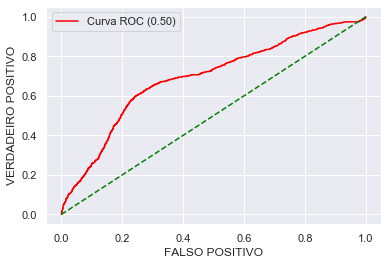

In [160]:
modelo_rn_full = Sequential();
modelo_rn_full.add(Dense(15,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml.columns)))
modelo_rn_full.add(Dense(7,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml.columns)))
modelo_rn_full.add(Dense(3,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml.columns)))
modelo_rn_full.add(Dense(3,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml.columns)))
modelo_rn_full.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal',input_dim=len(x_ml.columns)))
modelo_rn_full.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
modelo_rn_full.fit(x_ml,y_ml,epochs=5, callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3))

pred_rn_full = modelo_rn_full.predict(x_ml)
pred_rn_full_one = pred_rn_full.argmax(axis=1)

fper, tper, thresholds = roc_curve(y_ml, pred_rn_full)
plot_curva_roc(fper, tper, roc_auc_score(y_ml, pred_rn_full_one))

In [161]:
print(confusion_matrix(y_ml, pred_rn_full_one))

[[4185    0]
 [ 702    0]]


In [162]:
print(classification_report(y_ml, pred_rn_full_one,zero_division=0))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4185
           1       0.00      0.00      0.00       702

    accuracy                           0.86      4887
   macro avg       0.43      0.50      0.46      4887
weighted avg       0.73      0.86      0.79      4887



_Com esse modelo apesar de termos uma boa precisão para os Pokémons que não são do tipo AGUA, não obtivemos o mesmo ganho para o tipo AGUA, fazendo com que a curva ROC ficasse com score em 50%._